# Lending Club Case Study

## 1. Data Understanding

1. Problem Statement
2. Dataset Attributes
3. Dataset Row Analysis
4. Dataset Column Analysis
5. Handling missing data
6. Handling Outliers

### 1.1. Problem Statement

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

### 1.2. Dataset Attributes
#### Decision Matrix
When a person applies for a loan, there are two types of decisions that could be taken by the company:
1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:
- Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
- Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet - completed. These candidates are not labelled as 'defaulted'.
- Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)
#### Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


### 1.5. Dataset Row Analysis

- **Header & Footer Rows:** No header or footer rows in the dataset.
- **Extra Rows:** No column numbers, indicators, etc., found in the dataset.
- **Summary Rows:** No summary rows in the dataset.
- **Dropping Loan Status Rows with "Current" status:** Rows with a "loan_status" of "Current" will be dropped as they represent loans in progress and do not contribute to loan approval decisions. This step also helps clean up unnecessary columns related to "Current" loans and handle columns with NA values efficiently.
- **Identifying and Removing Duplicate Rows:** Duplicate rows in the dataset will be identified and removed if present.


### 1.6. Dataset Column Analysis

#### Dropping Columns 
- 54 columns contain **NA values only**, and these columns will be removed.
    - Columns to be dropped: 
        - `acc_open_past_24mths`, `all_util`, `annual_inc_joint`, `avg_cur_bal`, `bc_open_to_buy`, `bc_util`, `dti_joint`, `il_util`, `inq_fi`, `inq_last_12m, max_bal_bc`, `mo_sin_old_il_acct`, `mo_sin_old_rev_tl_op`, `mo_sin_rcnt_rev_tl_op`, `mo_sin_rcnt_tl`, `mort_acc`, `mths_since_last_major_derog`, `mths_since_rcnt_il`, `mths_since_recent_bc`, `mths_since_recent_bc_dlq`, `mths_since_recent_inq`, `mths_since_recent_revol_delinq`, `num_accts_ever_120_pd`, `num_actv_bc_tl`, `num_actv_rev_tl`, `num_bc_sats`, `num_bc_tl`, `num_il_tl`, `num_op_rev_tl`, `num_rev_accts`, `num_rev_tl_bal_gt_0`, `num_sats`, `num_tl_120dpd_2m`, `num_tl_30dpd`, `num_tl_90g_dpd_24m`, `num_tl_op_past_12m`, `open_acc_6m`, `open_il_12m`, `open_il_24m`, `open_il_6m`, `open_rv_12m`, `open_rv_24m`, `pct_tl_nvr_dlq`, `percent_bc_gt_75`, `tot_coll_amt`, `tot_cur_bal`, `tot_hi_cred_lim`, `total_bal_ex_mort`, `total_bal_il`, `total_bc_limit`, `total_cu_tl`, `total_il_high_credit_limit`, `total_rev_hi_lim`, `verification_status_joint` 

- Certain columns contain **only zero values**, and these columns will also be dropped.
- 9 Columns with **single value** that do not contribute to the analysis will be removed.
- Columns with values that are **single value but have other values as NA** will be treated as constant and dropped.
- Columns with **more than 65% of data being empty** `(mths_since_last_delinq, mths_since_last_record)` will be dropped.
- Columns `(id, member_id)` will be dropped as they are index variables with unique values and do not contribute to the analysis.
- Columns `(emp_title, desc, title)` will be dropped as they contain descriptive text (nouns) and do not contribute to the analysis.
- The redundant column `(url)` will be dropped. Further analysis reveals that the URL is a static path with the loan ID appended as a query, making it redundant compared to the `(id)` column.
- Customer behavior columns that represent data **post the approval of loans** will not be considered in the analysis and will be dropped.
- 660 records for `pub_rec_bankruptcies` are dropped due to missing values
    - These columns capture customer behavior recorded after loan approval and are not available at the time of loan approval. Thus, these variables will not be included in the analysis.
    - Columns to be dropped: `(delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, application_type)`

#### Converting Column Format
- Columns `(loan_amnt, funded_amnt, funded_amnt_inv)` are currently in object format and will be converted to float.
- Columns `(int_rate, installment, dti)` are currently in object format and will be converted to float.
- The `term` column will have the "months" text stripped and will be converted to an integer.
- Percentage columns like `(int_rate)` are currently in object format. These columns will have the "%" character stripped and will be converted to float.
- The `issue_d` column will be converted to datetime format with date in **YYYY-mm-dd** format.

#### Standardizing Values
- All currency columns will be rounded off to 2 decimal places, as currency values are limited to cents.
- Similar values for `home_ownership` like `NONE` and `OTHER` has been standardized as `OTHER`.
- Similar values for `verification_status` like `Source Verified` and `Verified` has been standardized as `Verified` 

#### Converting Column Values
- The `emp_length` column will be converted to an integer with the following logic:
    - `< 1 year`: 0
    - `2 years`: 2
    - `3 years`: 3
    - `4 years`: 4
    - `5 years`: 5
    - `1 year`: 1
    - `6 years`: 6
    - `7 years`: 7
    - `8 years`: 8
    - `9 years`: 9
    - `10+ years`: 10

#### Added New Columns
- `issue_y` represents the year extracted from `issue_d`.
- `issue_m` represents the month extracted from `issue_d`.
- `issue_q` has been added for binning the data quarter-wise.
- `loan_paid` has been added for simple mapping of Yes (Fully Paid) or No (Charged Off).
- `dti_bucket` has been added for binning DTI values from 8 (Very Low) to 20 (Very High).
- `loan_amnt_bucket` has been added for binning loan amount values.
- `funded_amnt_bucket` has been added for binning funded amount values.
- `annual_inc_bucket` has been added for binning annual income values.
- `int_rate_bucket` has been added for binning interest rate values.


### 1.7. Handling Missing Data

* **Dropping Columns:** Columns with a high percentage of missing values, specifically those exceeding 65%, will be removed.
* **Removing Rows:** Rows with a high percentage of missing values, exceeding 65%, will be removed from the dataset.
* **Imputing Missing Values:** Columns with a lower percentage of missing values will undergo imputation to fill in the missing data.

### 1.8. Handling Outliers

- In this analysis, the approach adopted is to remove all outlier values.
- The evaluation for outliers is performed on the following columns: `loan_amnt`, `funded_amnt`, `funded_amnt_inv`, `int_rate`, `installment`, `annual_inc`, `dti`.


## 2. Data Cleaning and Manipulation

1. Loading data from loan CSV
2. Checking for null values in the dataset
3. Checking for unique values
4. Checking for duplicated rows in data
5. Dropping records
6. Common Functions
7. Data Conversion
8. Outlier Treatment
9. Imputing values in Columns

### 2.1. Loading data from loan CSV

In [91]:
loan_df = pd.read_csv('loan.csv')
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.2. Checking for null values in the dataset

In [92]:
loan_df.isna().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

###### There are a lot of empty columns in the loan dataset. Dropping those columns from the dataset and then checking the dataset shape

In [93]:
cols_dropped = 0
for col in sorted(loan_df.columns):
    if loan_df[col].isna().sum() == loan_df.shape[0]:
        cols_dropped = cols_dropped + 1
        
print(f'Percentage of dropped columns = {round(cols_dropped / loan_df.shape[1] * 100, 2)}%')


Percentage of dropped columns = 48.65%


In [94]:
loan_df.dropna(axis = 1, how = 'all', inplace = True)
loan_df.shape

(39717, 57)

### 2.3. Checking for unique values

##### If the column has only a single unique value, it does not make any sense to include it as part of our data analysis. We need to find out those columns and drop them from the dataset

In [95]:
remove_columns_list = []
for i in loan_df.columns:
    # Check if unique value count is 1
    if loan_df[i].nunique() == 1:
        remove_columns_list.append(i)
    

# Remove those columns
loan_df.drop(remove_columns_list, axis = 1, inplace = True)

In [96]:
loan_df.shape

(39717, 48)

### 2.4. Checking for duplicated rows in data

In [97]:
loan_df[loan_df.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies


###### There is no duplicate row found

### 2.5 Dropping records

#### Dropping records where loan_status = 'Current'

###### The loan in progress cannot provide us insights as to whether the borrower is likely to default or not. Hence, dropping those records

In [98]:
loan_df = loan_df[loan_df['loan_status'].str.lower() != "current"]
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,NaN,Jan-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,NaN,Jun-07,NaN


#### Dropping columns where missing data is more than equal to 65%

###### These columns will skew our data analysis and they need to be removed

In [99]:
for col in loan_df.columns:
    missing_values = round(loan_df[col].isna().sum() / loan_df.shape[0], 2)
    if missing_values >= 0.65:
        loan_df.drop(col, axis = 1, inplace = True)
        
loan_df.shape

(38577, 45)

#### Dropping extra columns containing text like desc, emp_title, id, member_id, title, url, zip_code, etc. (full list below)

###### These will not contribute to loan pass or fail

In [100]:
# List the columns which are not required for the analysis. Total 27 columns
drop_cols = [
 'collection_recovery_fee',
 'delinq_2yrs',
 'desc',
 'earliest_cr_line',
 'emp_title',
 'id',
 'inq_last_6mths',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'member_id',
 'open_acc',
 'out_prncp',
 'out_prncp_inv',
 'pub_rec',
 'recoveries',
 'revol_bal',
 'revol_util',
 'title',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_late_fee',
 'total_rec_prncp',
 'url',
 'zip_code'
]

loan_df.drop(drop_cols, axis = 1, inplace = True)

In [101]:
loan_df.shape

(38577, 18)

### 2.6. Common Functions

In [102]:
def plot_bar_graph(dataframe, x_column, y_column=None, hue_column=None, title=None, xlabel=None, ylabel=None, figsize=(10, 6), x_tick_rotation=90, freq_rotation=0, filter_column=None, filter_value=None):
    """
    Create a Seaborn bar plot for a specified column in a DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        x_column (str): The name of the column to be plotted on the x-axis.
        y_column (str, optional): The name of the column to be plotted on the y-axis. Default is None.
        hue_column (str, optional): The name of the column to use for color differentiation. Default is None.
        title (str, optional): The title of the plot. Default is None.
        xlabel (str, optional): Label for the x-axis. Default is None.
        ylabel (str, optional): Label for the y-axis. Default is None.
        figsize (tuple, optional): Figure size in inches (width, height). Default is (10, 6).
        x_tick_rotation (int, optional): Rotation value for x-axis ticks. Default is 90.
        freq_rotation (int, optional): Rotation value for the exact frequency labels on each bar. Default is 0.
        filter_column (str, optional): The name of the column to filter on. Default is None.
        filter_value (any, optional): The value to filter the data on. Default is None.

    Returns:
        None
    """
    
    # Apply the filter if filter_column and filter_value are provided
    if filter_column and filter_value is not None:
        filtered_dataframe = dataframe[dataframe[filter_column] == filter_value]
    else:
        filtered_dataframe = dataframe

    # Set the style
    sns.set(style="whitegrid")

    # Create the bar plot
    plt.figure(figsize=figsize)
    
    if y_column:
        y_data = filtered_dataframe[y_column].value_counts()
        x_data = y_data.index
        sns.barplot(x=x_data, y=y_data.values, hue=hue_column)
    else:
        sns.barplot(data=filtered_dataframe, x=x_column, hue=hue_column)

    # Display frequency on top of the bars with rotation
    if y_column:
        for p in plt.gca().patches:
            plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', rotation=freq_rotation)

    # Set title and labels
    if title:
        plt.title(title, fontsize=14)
    if xlabel:
        plt.xlabel(xlabel, fontsize=12)
    if ylabel:
        plt.ylabel(ylabel, fontsize=12)

    # Rotate x-axis labels
    plt.xticks(rotation=x_tick_rotation)

    # Show the plot
    plt.show()

In [103]:
def calculate_boxplot_stats(df: pd.DataFrame, column: str, iqr_multiplier: float = 1.5) -> dict:
    """
    Calculate the Interquartile Range (IQR) and the lower and upper bounds for outlier detection.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The name of the column for which to calculate the IQR and bounds.
        iqr_multiplier (float, optional): Multiplier for the IQR to determine bounds. Default is 1.5.

    Returns:
        dict: A dictionary containing the following values:
            - 'quartile1': The first quartile (25th percentile).
            - 'quartile3': The third quartile (75th percentile).
            - 'iqr': The Interquartile Range (IQR).
            - 'lower_bound': The lower bound for outlier detection.
            - 'upper_bound': The upper bound for outlier detection.
    """
    quartile1 = df[column].quantile(0.25)
    quartile3 = df[column].quantile(0.75)
    iqr = quartile3 - quartile1
    lower_bound = quartile1 - iqr_multiplier * iqr
    upper_bound = quartile3 + iqr_multiplier * iqr
    return {
        'iqr': iqr,
        'quartile1': quartile1,
        'quartile3': quartile3,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }


In [104]:
def create_boxplot(df: pd.DataFrame, column_name: str, title: str = None, horizontal: bool = True) -> None:
    """
    Create a box plot for a specified column in a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to be plotted.
        title (str, optional): The title of the plot. Default is None.
        orient (str): The orientation of the plot. Default is horizontal. Possible values - h, v.

    Returns:
        None
    """

    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return

    plt.figure(figsize=(8, 6))
    if horizontal:
        sns.boxplot(y=df[column_name], orient='h', palette='Set2')
    else:
        sns.boxplot(x=df[column_name], orient='v', palette='Set2')

    if title:
        plt.title(title)

    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.show()


In [105]:
def plot_histogram(data, column, bins=10, title=None, xlabel=None, ylabel=None, figsize=(8, 6)):
    """
    Create a histogram using Seaborn's histplot for a specified column in a DataFrame or Series.

    Parameters:
        data (pd.DataFrame or pd.Series): The data to be plotted.
        column (str): The name of the column or Series to be plotted.
        bins (int, optional): The number of bins in the histogram. Default is 10.
        title (str, optional): The title of the plot. Default is None.
        xlabel (str, optional): Label for the x-axis. Default is None.
        ylabel (str, optional): Label for the y-axis. Default is None.
        figsize (tuple, optional): Figure size in inches (width, height). Default is (8, 6).

    Returns:
        None
    """
    # Set the style
    sns.set(style="whitegrid")

    # Create the histogram
    plt.figure(figsize=figsize)
    sns.histplot(data=data, x=column, bins=bins, kde=True)

    # Set title and labels
    if title:
        plt.title(title, fontsize=14)
    if xlabel:
        plt.xlabel(xlabel, fontsize=12)
    if ylabel:
        plt.ylabel(ylabel, fontsize=12)

    # Show the plot
    plt.show()

In [106]:
def countplot_graph(data_dict: dict, annot=True) -> None:
    """
    Create a countplot graph.

    Args:
        data_dict (dict): A dictionary containing the following keys:
            - 'data' (DataFrame): The DataFrame containing the data.
            - 'x' (str): The column to be plotted on the x-axis.
            - 'figsize' (tuple, optional): Size of the figure in (x, y) format.
            - 'hue' (str, optional): The column to be used for color differentiation (default None).
            - 'order' (list, optional): Order of categorical values on the x-axis (default None).
            - 'xlabel' (str, optional): Label for the x-axis (default None).
            - 'ylabel' (str, optional): Label for the y-axis (default None).
            - 'title' (str, optional): Title for the plot (default None).
            - 'palette' (list, optional): List of colors for the plot (default None).
            - 'x_tick_rotation' (int, optional): Rotation value for x-axis ticks.
        annot (bool): Boolean flag to show or hide annotations. Default is True.

    Returns:
        None
    """
    df = data_dict['data']
    x = data_dict['x']
    figsize = data_dict['figsize']
    hue = data_dict.get('hue')
    order = data_dict.get('order')
    x_tick_rotation = data_dict.get('x_tick_rotation')
    xlabel = data_dict.get('xlabel')
    ylabel = data_dict.get('ylabel')
    title = data_dict.get('title')
    palette = data_dict.get('palette')

    fig, ax = plt.subplots(figsize=figsize, dpi=100)

    sns.countplot(x=x, hue=hue, data=df, order=order, palette=palette)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    if annot:
        for p in ax.patches:
            ax.annotate('{:1}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 10))

    ax.set_title(title)
    
    if x_tick_rotation:
        plt.xticks(rotation=x_tick_rotation)

    plt.show()


In [107]:
def plot_charged_off_percentage(df, column, stacked=False):
    """
    Calculate and plot the Charged Off percentage and the number of loans for a specified column.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The column for which to calculate and plot Charged Off percentage.
        stacked (bool, optional): Whether to create a stacked bar plot (default: False).

    Returns:
        None
    """
    # Calculate Charged Off percentage
    charged_off_data = pd.crosstab(df[column], df['loan_status'], margins=True)
    charged_off_data['Total'] = charged_off_data['Charged Off'] + charged_off_data['Fully Paid']
    charged_off_data['Charged Off %'] = round((charged_off_data['Charged Off'] * 100 / charged_off_data['Total']), 2)
    # Remove the last row with sum total
    charged_off_data = charged_off_data[0:-1]

    # Plot
    fig, ax1 = plt.subplots(figsize=(20, 8))

    # Line plot for Charged Off Percentage
    charged_off_plot = charged_off_data[['Charged Off %']]
    line = charged_off_plot.plot(ax=ax1, marker='o', color='r', lw=2)
    line.set_title(column.title() + ' vs Charged Off %', fontsize=20, weight="bold")
    line.set_xlabel(column.title())
    line.set_ylabel('Charged Off %')

    # Bar plot for Number of Loans
    loans_plot = charged_off_data.iloc[:, 0:3]
    ax2 = loans_plot.plot(kind='bar', ax=ax1, rot=1, secondary_y=True, stacked=stacked)
    ax2.set_ylabel('Number of Loans')
    
    plt.show()


In [108]:
def bucket_data(column, thresholds, labels) -> str:
    """
    Bucket data based on specified thresholds and labels.

    Parameters:
        column (float): The numeric value to be bucketed.
        thresholds (list of float): The list of threshold values for bucketing.
        labels (list of str): The list of labels corresponding to the buckets.

    Returns:
        str: The bucket label for the given column value.
    """
    for i, threshold in enumerate(thresholds):
        if column < threshold:
            return labels[i]
    return labels[-1]


In [109]:
def charged_off_percent(df, column, duration):
    charged_off = df[(df[column] == duration) & (df['loan_status'] == 'Charged Off')][column].value_counts()[duration]
    total = df[df[column] == duration][column].value_counts()[duration]
    return round((charged_off / total) * 100, 2)

#### Sorting the dataframe columns in ascending order to address all columns alphabetically

In [110]:
loan_df = loan_df.reindex(sorted(loan_df.columns), axis=1)
loan_df

,addr_state,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,issue_d,loan_amnt,loan_status,pub_rec_bankruptcies,purpose,sub_grade,term,verification_status
0,AZ,24000.0,27.65,10+ years,5000,4975.0,B,RENT,162.87,10.65%,Dec-11,5000,Fully Paid,0.0,credit_card,B2,36 months,Verified
1,GA,30000.0,1.00,< 1 year,2500,2500.0,C,RENT,59.83,15.27%,Dec-11,2500,Charged Off,0.0,car,C4,60 months,Source Verified
2,IL,12252.0,8.72,10+ years,2400,2400.0,C,RENT,84.33,15.96%,Dec-11,2400,Fully Paid,0.0,small_business,C5,36 months,Not Verified
3,CA,49200.0,20.00,10+ years,10000,10000.0,C,RENT,339.31,13.49%,Dec-11,10000,Fully Paid,0.0,other,C1,36 months,Source Verified
5,AZ,36000.0,11.20,3 years,5000,5000.0,A,RENT,156.46,7.90%,Dec-11,5000,Fully Paid,0.0,wedding,A4,36 months,Source Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,CO,110000.0,11.33,4 years,2500,1075.0,A,MORTGAGE,78.42,8.07%,Jul-07,2500,Fully Paid,NaN,home_improvement,A4,36 months,Not Verified
39713,NC,18000.0,6.40,3 years,8500,875.0,C,RENT,275.38,10.28%,Jul-07,8500,Fully Paid,NaN,credit_card,C1,36 months,Not Verified
39714,MA,100000.0,2.30,< 1 year,5000,1325.0,A,MORTGAGE,156.84,8.07%,Jul-07,5000,Fully Paid,NaN,debt_consolidation,A4,36 months,Not Verified
39715,MD,200000.0,3.72,< 1 year,5000,650.0,A,MORTGAGE,155.38,7.43%,Jul-07,5000,Fully Paid,NaN,other,A2,36 months,Not Verified


### 2.7. Data Conversion

###### Convert debt to income (dti), funded amount (funded_amnt), funded amount investor (funded_amnt_inv) and loan amount (loan_amnt) to float to match the data

In [111]:
loan_df = loan_df.astype({
    'dti': 'float',
    'funded_amnt' : 'float',
    'funded_amnt_inv' : 'float',
    'loan_amnt' : 'float'
})

###### Convert loan term (term) to int and interest rate (int_rate) to float to match the data

In [112]:
# Convert term column to int type
loan_df['term'] = loan_df['term'].apply(lambda x: int(x.replace('months', '').strip()))

In [113]:
# Convert int_rate column to float type
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: float(x.replace('%', '').strip()))

In [114]:
# Rounding of the values of below columns to two decimal places
for col in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    loan_df[col] = loan_df[col].apply(lambda x: round(x, 2))

###### Convert loan date (issue_d) to DateTime (format: yyyy-mm-dd)

In [115]:
# Converting the column issue_d from string to DateTime
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format = '%b-%y')

### 2.8. Outlier Treatment

In [116]:
loan_df.annual_inc.value_counts().sort_index(ascending=False)

annual_inc
6000000.0    1
3900000.0    1
2039784.0    1
1900000.0    1
1782000.0    1
            ..
4888.0       1
4800.0       4
4200.0       2
4080.0       1
4000.0       1
Name: count, Length: 5215, dtype: int64

###### Annual income has outliers. Calculating the inter-quartile range (IQR) and filtering out the outliers outside of lower and upper bound

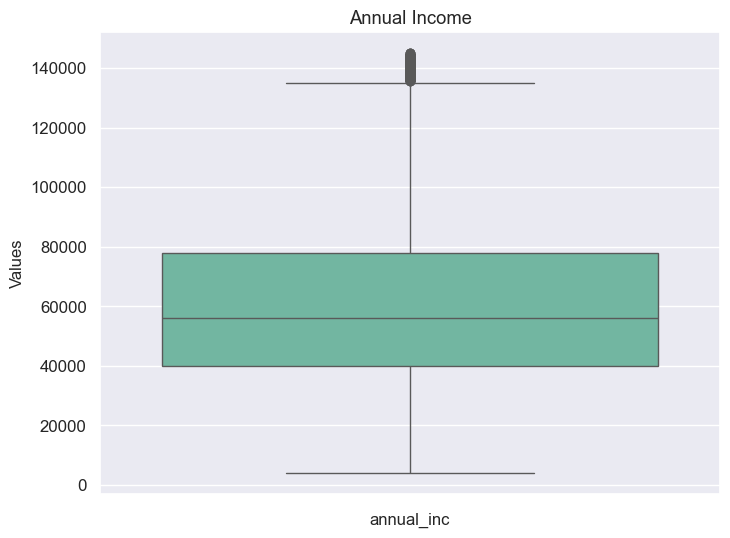

In [117]:
# Calculate the lower bound and upper bound
is_annual_inc_lb = calculate_boxplot_stats(loan_df, 'annual_inc')['lower_bound']
is_annual_inc_ub = calculate_boxplot_stats(loan_df, 'annual_inc')['upper_bound']
is_annual_inc_lt = loan_df.annual_inc > is_annual_inc_lb
is_annual_inc_gt = loan_df.annual_inc < is_annual_inc_ub

req_income = is_annual_inc_lt & is_annual_inc_gt

# Filter the rows with required annual income range between lower and upper bound
loan_df = loan_df[req_income]

# Show boxplot
create_boxplot(loan_df, 'annual_inc', title='Annual Income')

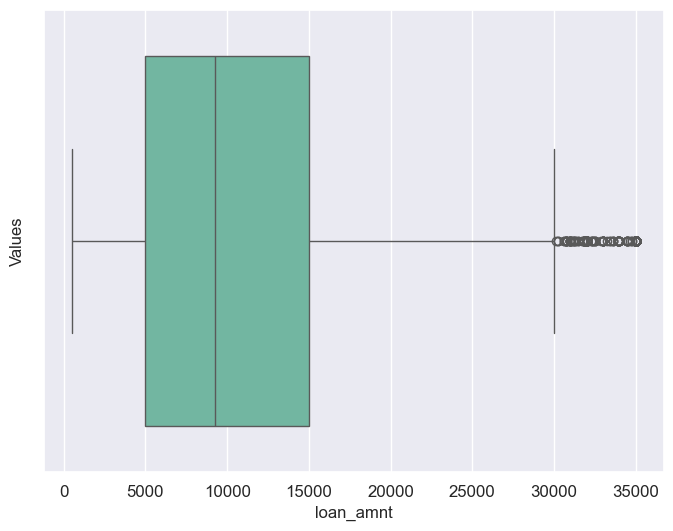

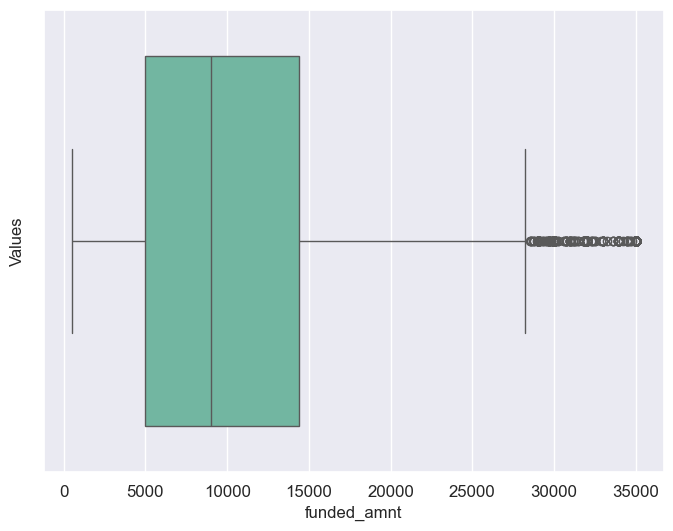

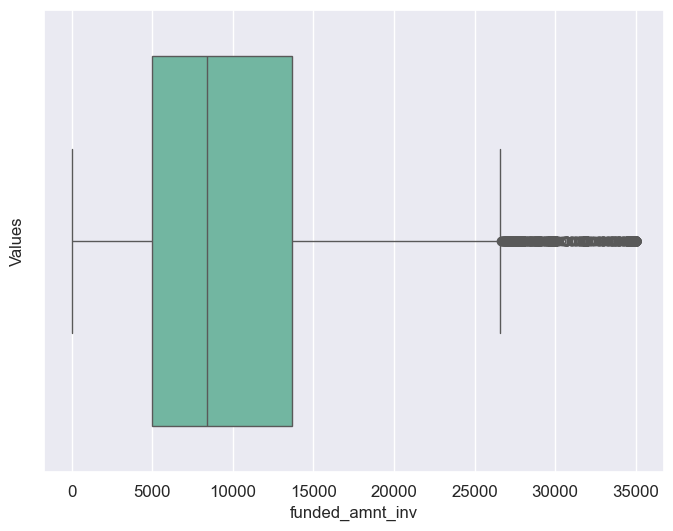

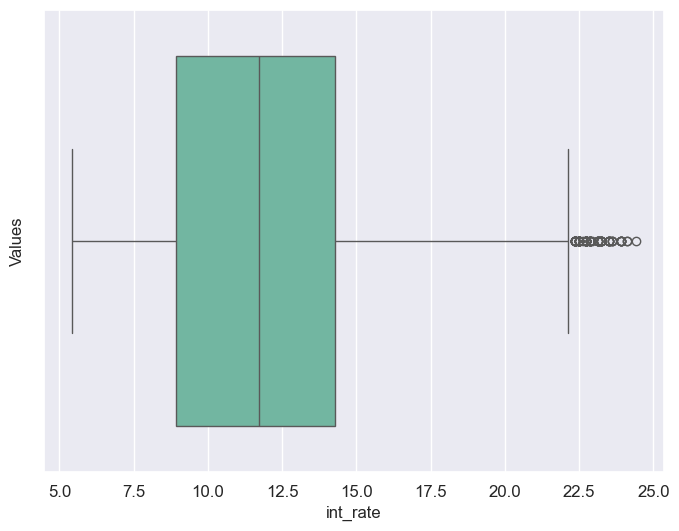

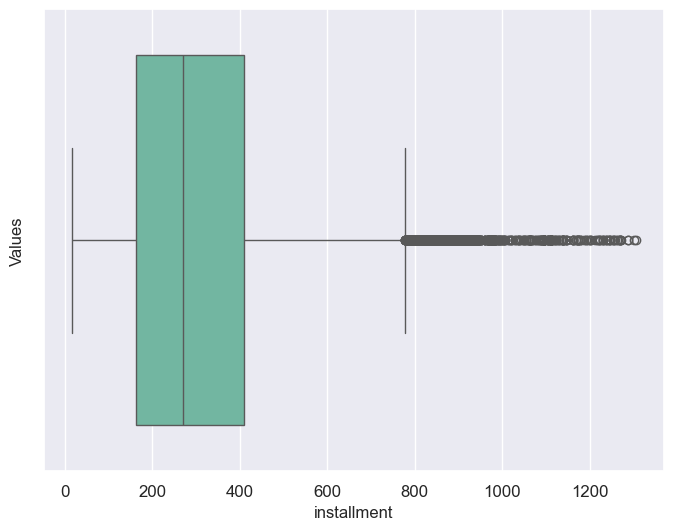

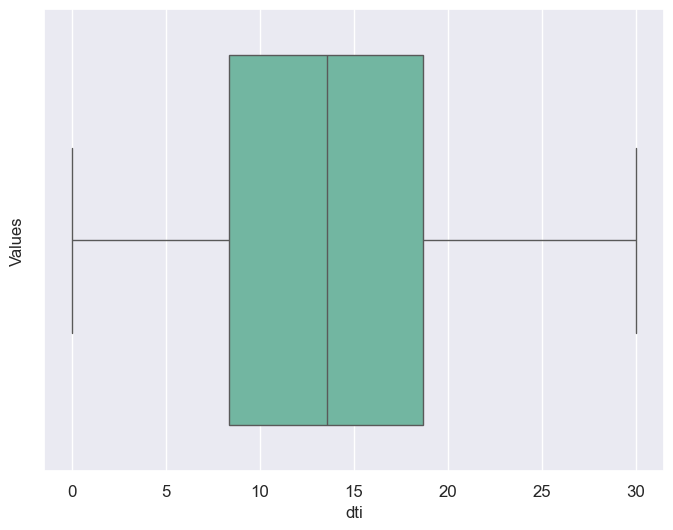

In [118]:
for col in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'dti']:
    create_boxplot(loan_df, col, horizontal=False)

- The annual income of most of the loan applicants is between 40, 000 - 75, 000 USD
- The loan amount of most of the loan applicants is between 5, 000 - 15, 000 
- The funded amount of most of the loan applicants is between 5, 000 - 14, 000 USD
- The funded amount by investor for most of the loan applicants is between 5, 000 - 14, 000 USD
- The interest rate on the loan is between 9% - 14%
- The monthly installment amount on the loan is between 160 - 440
- The debt to income ration is between 8 - 18

### 2.9. Imputing values in Columns

In [119]:
loan_df.emp_length.isna().sum()

np.int64(1015)

In [120]:
# Annual income of loan applicants whose employment length is missing
loan_df[loan_df.emp_length.isna()]['annual_inc'].describe()

count      1015.000000
mean      42537.019271
std       24044.887728
min        4200.000000
25%       24468.000000
50%       37404.000000
75%       55780.000000
max      144000.000000
Name: annual_inc, dtype: float64

In [121]:
# Most frequent Annual income of loan applicants whose employment length is missing
loan_df[loan_df.emp_length.isna()]['annual_inc'].mode()

0    36000.0
Name: annual_inc, dtype: float64

In [122]:
# Find the most frequent value of employment length
loan_df.emp_length.value_counts()

emp_length
10+ years    7923
< 1 year     4338
2 years      4112
3 years      3832
4 years      3206
1 year       3052
5 years      3051
6 years      2078
7 years      1646
8 years      1347
9 years      1154
Name: count, dtype: int64

In [123]:
loan_df.emp_length.mode()

0    10+ years
Name: emp_length, dtype: object

###### Employment length has 1015 missing values, which means either they are not employed or self-employed (business owners). Considering they have a decent average annual income, we have assumed that these are business owners and we have added their employment duration with the mode value of emp_length which is 10+ years

In [124]:
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0], inplace = True)

In [125]:
# Verify if the imputation of values is successful
loan_df.emp_length.isna().sum()

np.int64(0)

###### Mapping employment length with the respective number of years in int

In [126]:
emp_length_mapping: dict = {
    '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
    '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
    '8 years': 8, '9 years': 9, '10+ years': 10
}

# Use the map function to replace values in the 'emp_length' column
loan_df['emp_length'] = loan_df['emp_length'].map(emp_length_mapping)

In [127]:
loan_df.home_ownership.value_counts()

home_ownership
RENT        18050
MORTGAGE    15750
OWN          2858
OTHER          93
NONE            3
Name: count, dtype: int64

###### Imputing NONE values as OTHER for home_ownership

In [128]:
loan_df['home_ownership'].replace('NONE', 'OTHER', inplace = True)

In [129]:
loan_df.home_ownership.value_counts()

home_ownership
RENT        18050
MORTGAGE    15750
OWN          2858
OTHER          96
Name: count, dtype: int64

In [130]:
loan_df.verification_status.value_counts()

verification_status
Not Verified       16306
Verified           11269
Source Verified     9179
Name: count, dtype: int64

###### Replacing the 'Source Verified' values as 'Verified' since both values mean the same thing i.e. the loan applicant has some source of income which is verified

In [131]:
loan_df['verification_status'].replace('Source Verified', 'Verified', inplace = True)

In [132]:
loan_df.verification_status.value_counts()

verification_status
Verified        20448
Not Verified    16306
Name: count, dtype: int64

In [133]:
loan_df.pub_rec_bankruptcies.isna().sum()

np.int64(660)

In [134]:
loan_df[loan_df.pub_rec_bankruptcies.isna()]

,addr_state,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,issue_d,loan_amnt,loan_status,pub_rec_bankruptcies,purpose,sub_grade,term,verification_status
35006,NY,110000.0,7.07,0,15000.0,14875.00,A,MORTGAGE,476.58,8.94,2009-09-01,15000.0,Fully Paid,NaN,credit_card,A5,36,Not Verified
35058,TX,80800.0,14.97,3,3000.0,2988.24,C,MORTGAGE,102.92,14.26,2009-09-01,3000.0,Fully Paid,NaN,credit_card,C5,36,Not Verified
35362,MI,60000.0,11.08,0,4000.0,3892.26,B,MORTGAGE,131.22,11.14,2009-08-01,4000.0,Charged Off,NaN,car,B1,36,Not Verified
38443,NJ,37152.0,2.26,10,2300.0,589.61,D,RENT,77.69,13.17,2008-08-01,2300.0,Fully Paid,NaN,moving,D2,36,Verified
38717,OH,75000.0,16.08,0,6000.0,500.00,A,MORTGAGE,188.02,8.00,2008-05-01,6000.0,Fully Paid,NaN,other,A3,36,Not Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39711,CO,75000.0,15.55,5,5000.0,700.00,B,MORTGAGE,158.30,8.70,2007-07-01,5000.0,Fully Paid,NaN,credit_card,B1,36,Not Verified
39712,CO,110000.0,11.33,4,2500.0,1075.00,A,MORTGAGE,78.42,8.07,2007-07-01,2500.0,Fully Paid,NaN,home_improvement,A4,36,Not Verified
39713,NC,18000.0,6.40,3,8500.0,875.00,C,RENT,275.38,10.28,2007-07-01,8500.0,Fully Paid,NaN,credit_card,C1,36,Not Verified
39714,MA,100000.0,2.30,0,5000.0,1325.00,A,MORTGAGE,156.84,8.07,2007-07-01,5000.0,Fully Paid,NaN,debt_consolidation,A4,36,Not Verified


#### There are multiple null values for pub_rec_bankruptcies. Dropping those rows as they cannot be imputed.

In [135]:
loan_df = loan_df[loan_df.pub_rec_bankruptcies.notna()]

In [136]:
# Verify if the dataset has no longer null values
loan_df.isna().sum()

addr_state              0
annual_inc              0
dti                     0
emp_length              0
funded_amnt             0
funded_amnt_inv         0
grade                   0
home_ownership          0
installment             0
int_rate                0
issue_d                 0
loan_amnt               0
loan_status             0
pub_rec_bankruptcies    0
purpose                 0
sub_grade               0
term                    0
verification_status     0
dtype: int64

#### Cleaned up loan dataset

In [137]:
loan_df

,addr_state,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,issue_d,loan_amnt,loan_status,pub_rec_bankruptcies,purpose,sub_grade,term,verification_status
0,AZ,24000.0,27.65,10,5000.0,4975.0,B,RENT,162.87,10.65,2011-12-01,5000.0,Fully Paid,0.0,credit_card,B2,36,Verified
1,GA,30000.0,1.00,0,2500.0,2500.0,C,RENT,59.83,15.27,2011-12-01,2500.0,Charged Off,0.0,car,C4,60,Verified
2,IL,12252.0,8.72,10,2400.0,2400.0,C,RENT,84.33,15.96,2011-12-01,2400.0,Fully Paid,0.0,small_business,C5,36,Not Verified
3,CA,49200.0,20.00,10,10000.0,10000.0,C,RENT,339.31,13.49,2011-12-01,10000.0,Fully Paid,0.0,other,C1,36,Verified
5,AZ,36000.0,11.20,3,5000.0,5000.0,A,RENT,156.46,7.90,2011-12-01,5000.0,Fully Paid,0.0,wedding,A4,36,Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,VA,35000.0,7.51,1,4800.0,1100.0,C,RENT,155.52,10.28,2007-11-01,4800.0,Fully Paid,1.0,debt_consolidation,C1,36,Not Verified
39573,AZ,63500.0,8.50,3,7000.0,1000.0,C,MORTGAGE,227.82,10.59,2007-11-01,7000.0,Fully Paid,1.0,debt_consolidation,C2,36,Not Verified
39623,MD,39000.0,5.08,8,9000.0,700.0,D,MORTGAGE,301.04,12.49,2007-10-01,9000.0,Charged Off,1.0,debt_consolidation,D3,36,Not Verified
39666,VA,40000.0,13.50,2,15450.0,600.0,C,MORTGAGE,507.46,11.22,2007-08-01,15450.0,Charged Off,1.0,debt_consolidation,C4,36,Not Verified


## 3. Data Analysis
1. Derived Columns
2. Univariate Analysis (including Segmented Univariate Analysis)
3. Bivariate Analysis

### 3.1. Derived Columns
1. Derived metrics for Month (issue_m), Year (issue_y) and Quarter (issue_q) from column "issue_d"
2. Create new column loan_paid with 'Yes' and 'No' values based on loan_status column where 'Yes' = "Fully Paid" and 'No' = "Charged off"
3. Creating different buckets for loan amount (loan_amount_bucket), interest rate (interest_rate_bucket), annual income (annual_income_bucket)

#### 3.1.1. Derived metrics for Month (issue_m), Year (issue_y) and Quarter (issue_q) from column "issue_d"

In [138]:
# Extracting Month and Year for analysis from issue_d
loan_df['issue_m'] = pd.DatetimeIndex(loan_df['issue_d']).month
loan_df['issue_y'] = pd.DatetimeIndex(loan_df['issue_d']).year

In [139]:
# Categorising Months into quaterly buckets
threshold_months = [4, 7, 9]
quarter_labels = ['Q1', 'Q2', 'Q3', 'Q4']
loan_df['issue_q'] = loan_df['issue_m'].apply(bucket_data, args=(threshold_months, quarter_labels))

In [140]:
loan_df[['issue_d', 'issue_m', 'issue_q']]

,issue_d,issue_m,issue_q
0,2011-12-01,12,Q4
1,2011-12-01,12,Q4
2,2011-12-01,12,Q4
3,2011-12-01,12,Q4
5,2011-12-01,12,Q4
...,...,...,...
39562,2007-11-01,11,Q4
39573,2007-11-01,11,Q4
39623,2007-10-01,10,Q4
39666,2007-08-01,8,Q3


#### 3.1.2. Create new column loan_paid with 'Yes' and 'No' values based on loan_status column where 'Yes' = "Fully Paid" and 'No' = "Charged off"

In [141]:
loan_status_map = {'Charged Off': 'No', 'Fully Paid': 'Yes' }
loan_df['loan_paid'] = loan_df['loan_status'].map(loan_status_map)

#### 3.1.3. Creating different buckets for loan amount (loan_amount_bucket), interest rate (interest_rate_bucket), annual income (annual_income_bucket), funded amount bucket (funded_amnt_bucket), Debt to Income Bucket (dti_bucket)

In [142]:
# Categorising Loan Amount
loan_amount_thresholds = [5000, 10000, 15000]
loan_amount_labels = ['0 - 5K', '5K - 10K', '10K - 15K', '15K - above']
loan_df['loan_amnt_bucket'] = loan_df['loan_amnt'].apply(bucket_data, args=(loan_amount_thresholds, loan_amount_labels))

In [143]:
loan_df[['loan_amnt', 'loan_amnt_bucket']]

,loan_amnt,loan_amnt_bucket
0,5000.0,5K - 10K
1,2500.0,0 - 5K
2,2400.0,0 - 5K
3,10000.0,10K - 15K
5,5000.0,5K - 10K
...,...,...
39562,4800.0,0 - 5K
39573,7000.0,5K - 10K
39623,9000.0,5K - 10K
39666,15450.0,15K - above


In [144]:
# Bucketting for int_rate
int_rate_bins = [5, 9, 13, 17, 21]
int_rate_labels = ['0%-5%', '5%-9%','9%-13%','13%-17%','17%-21%','21%-25%']
loan_df['int_rate_bucket'] = loan_df['int_rate'].apply(bucket_data, args=((int_rate_bins, int_rate_labels)))

In [145]:
loan_df[['int_rate', 'int_rate_bucket']]

,int_rate,int_rate_bucket
0,10.65,9%-13%
1,15.27,13%-17%
2,15.96,13%-17%
3,13.49,13%-17%
5,7.90,5%-9%
...,...,...
39562,10.28,9%-13%
39573,10.59,9%-13%
39623,12.49,9%-13%
39666,11.22,9%-13%


In [146]:
# Bucketting Annual Income
annual_inc_thresholds = [40000, 50000, 60000, 70000, 80000]
annual_inc_labels = ['0 - 40k', '40k - 50k', '50k - 60k', '60k - 70k', '70k - 80k', '80k - above']
loan_df['annual_inc_bucket'] = loan_df['annual_inc'].apply(bucket_data, args=(annual_inc_thresholds, annual_inc_labels))

In [147]:
loan_df[['annual_inc', 'annual_inc_bucket']]

,annual_inc,annual_inc_bucket
0,24000.0,0 - 40k
1,30000.0,0 - 40k
2,12252.0,0 - 40k
3,49200.0,40k - 50k
5,36000.0,0 - 40k
...,...,...
39562,35000.0,0 - 40k
39573,63500.0,60k - 70k
39623,39000.0,0 - 40k
39666,40000.0,40k - 50k


In [148]:
# Bucketting Funded Amount
funded_amnt_thresholds = [5000, 10000, 15000]
funded_amnt_labels = ['0 - 5k', '5k - 10k', '10k - 15k', '15k - above']
loan_df['funded_amnt_bucket'] = loan_df['funded_amnt'].apply(bucket_data, args=(funded_amnt_thresholds, funded_amnt_labels))

In [149]:
loan_df[['funded_amnt', 'funded_amnt_bucket']]

,funded_amnt,funded_amnt_bucket
0,5000.0,5k - 10k
1,2500.0,0 - 5k
2,2400.0,0 - 5k
3,10000.0,10k - 15k
5,5000.0,5k - 10k
...,...,...
39562,4800.0,0 - 5k
39573,7000.0,5k - 10k
39623,9000.0,5k - 10k
39666,15450.0,15k - above


In [150]:
# Bucketting DTI
dti_thresholds = [8, 12, 16, 20]
dti_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
loan_df['dti_bucket'] = loan_df['dti'].apply(bucket_data, args=(dti_thresholds, dti_labels))

In [151]:
loan_df[['dti', 'dti_bucket']]

,dti,dti_bucket
0,27.65,Very High
1,1.00,Very Low
2,8.72,Low
3,20.00,Very High
5,11.20,Low
...,...,...
39562,7.51,Very Low
39573,8.50,Low
39623,5.08,Very Low
39666,13.50,Medium


### 3.2 Univariate Analysis

Following fields will be checked as part of univariate analysis

#### 1. Categorical variables
    1. Ordered categorical data
        1. Grade (grade)
        2. Sub grade (sub_grade)
        3. Term (36 / 60 months) (term)
        4. Employment length (emp_length)
        5. Issue year (issue_y)
        6. Issue month (issue_m)
        7. Issue quarter (issue_q)

    2. Unordered categorical data
        1. Address State (addr_state)
        2. Loan purpose (purpose)
        3. Home Ownership (home_ownership)
        4. Loan status (loan_status)
        5. Loan paid (loan_paid)
    
#### 2. Quantitative variables
    1. Interest rate bucket (int_rate_bucket)
    2. Annual income bucket (annual_inc_bucket)
    3. Loan amount bucket (loan_amnt_bucket)
    4. Funded amount bucket (funded_amnt_bucket)
    5. Debt to Income Ratio (DTI) bucket (dti_bucket)
    6. Monthly Installment (installment)
    

#### 3.2.1.1. Ordered Categorical Variables

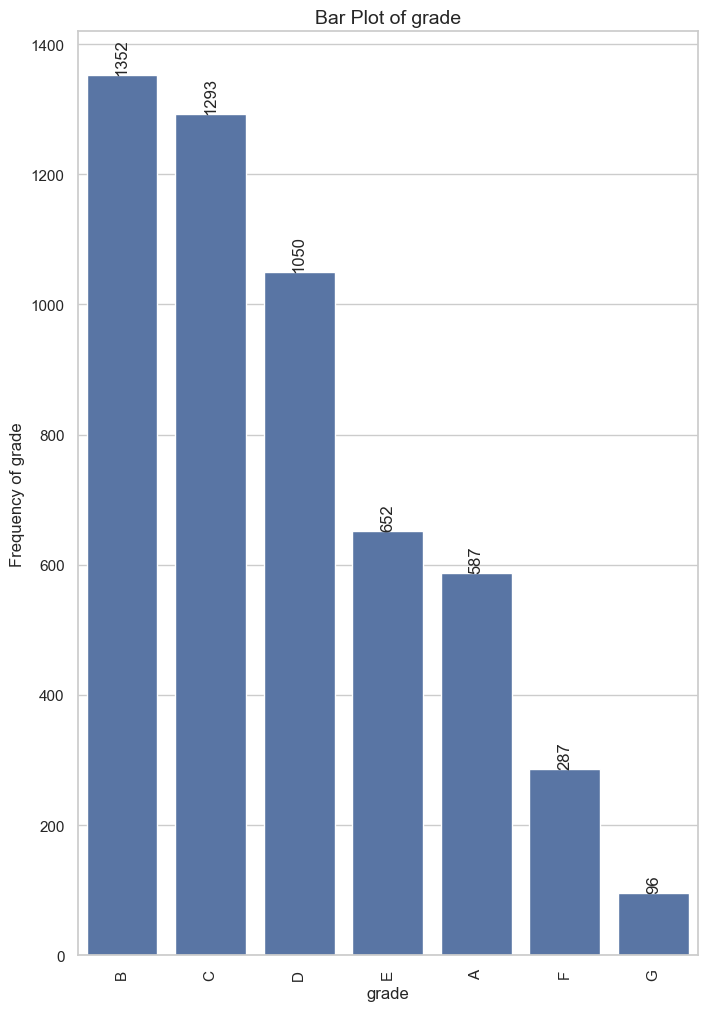

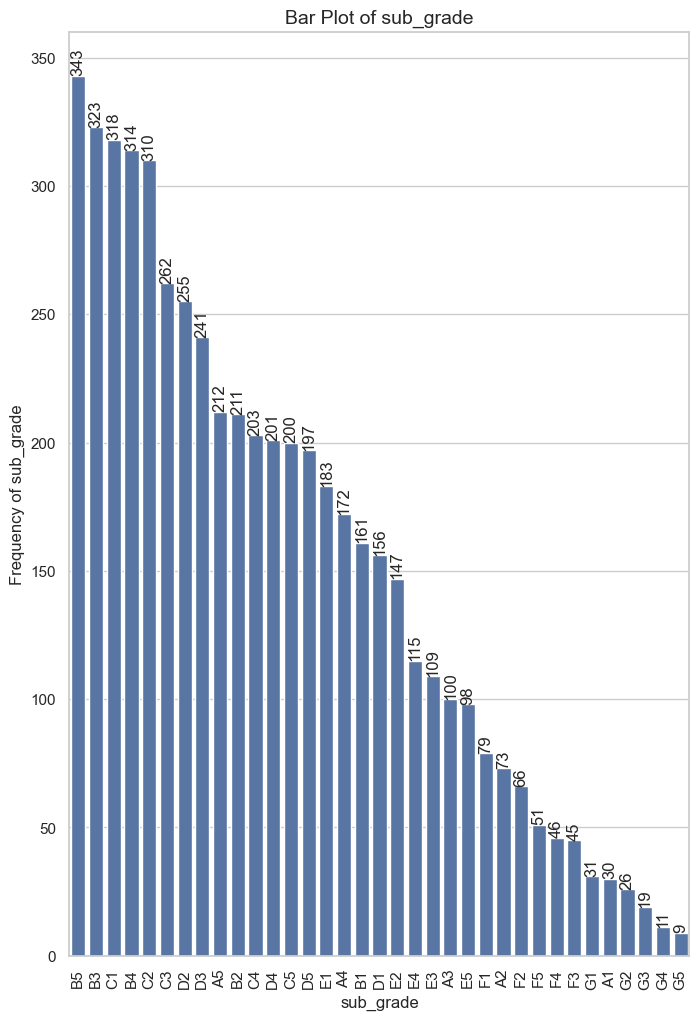

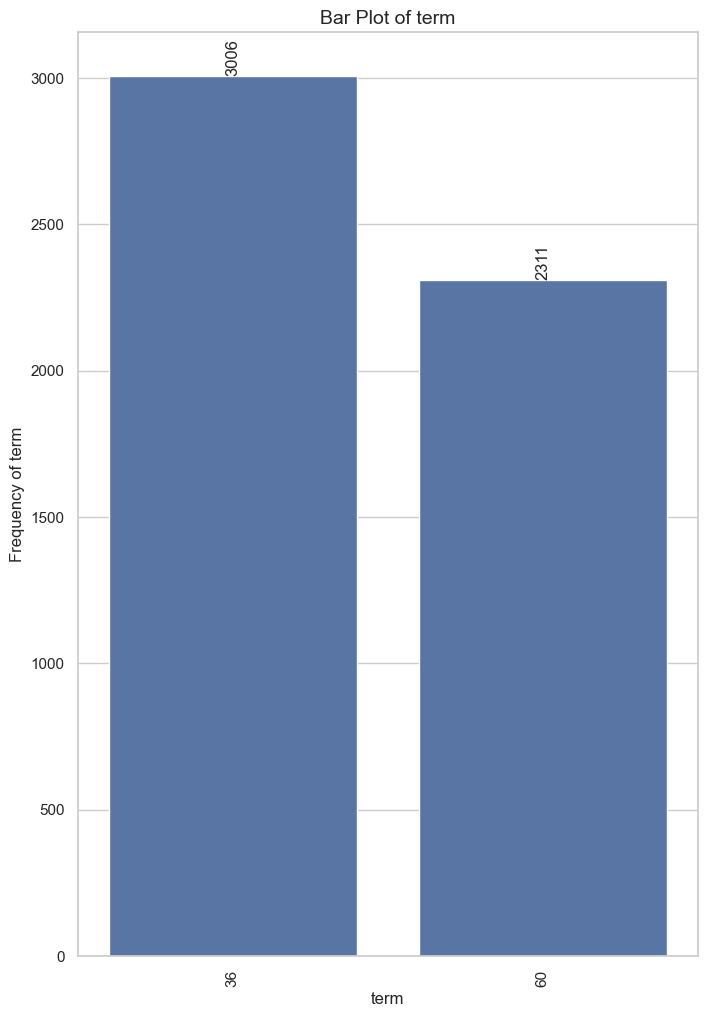

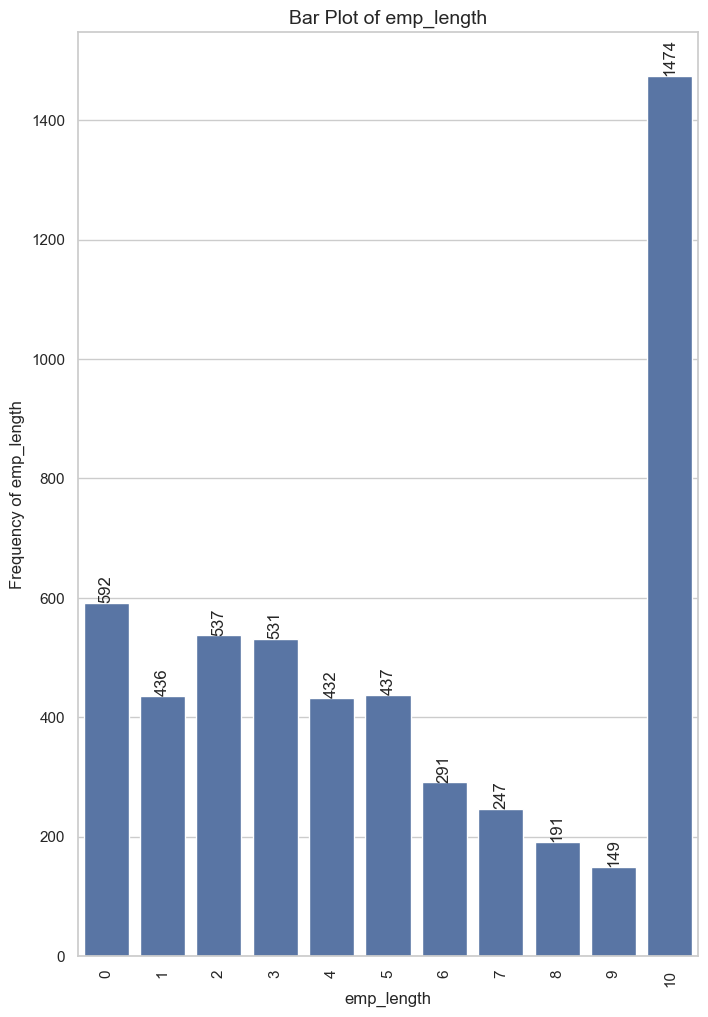

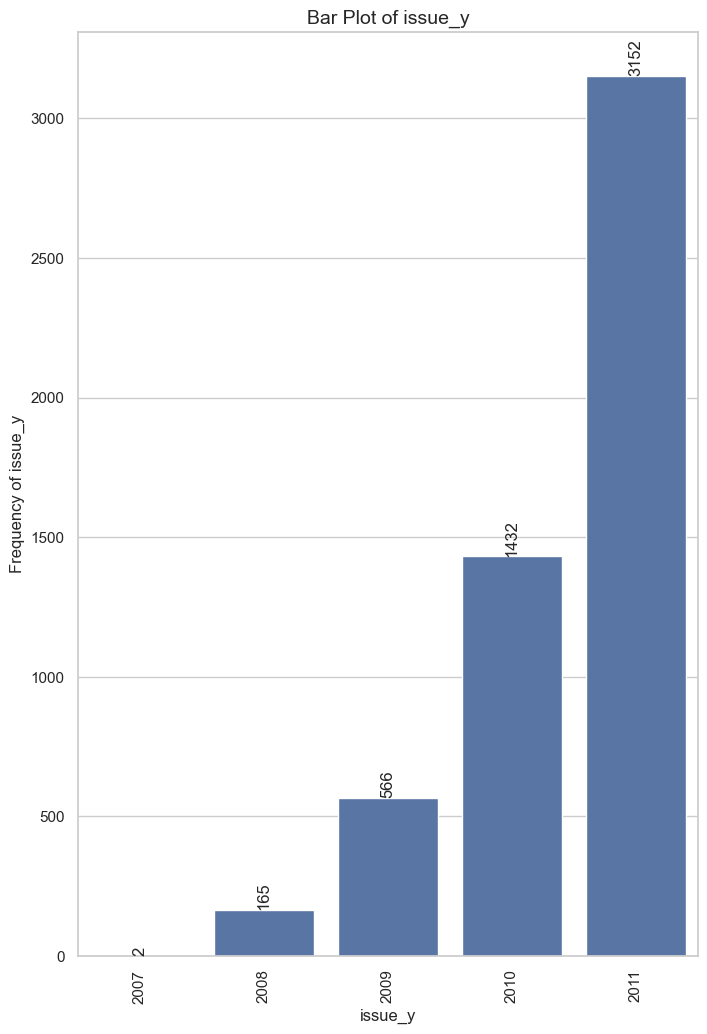

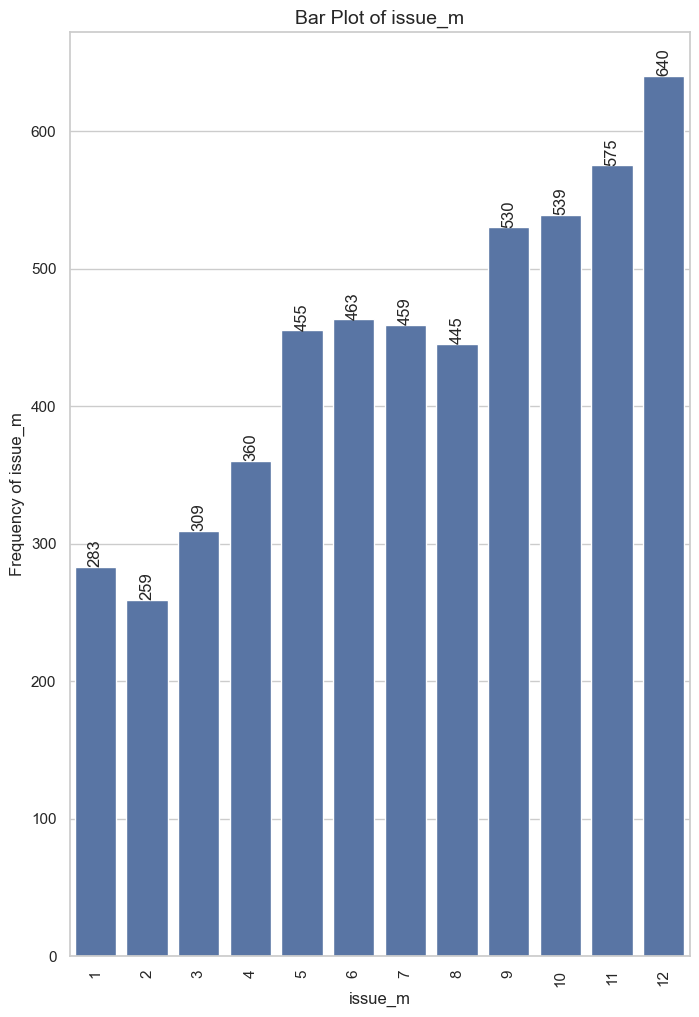

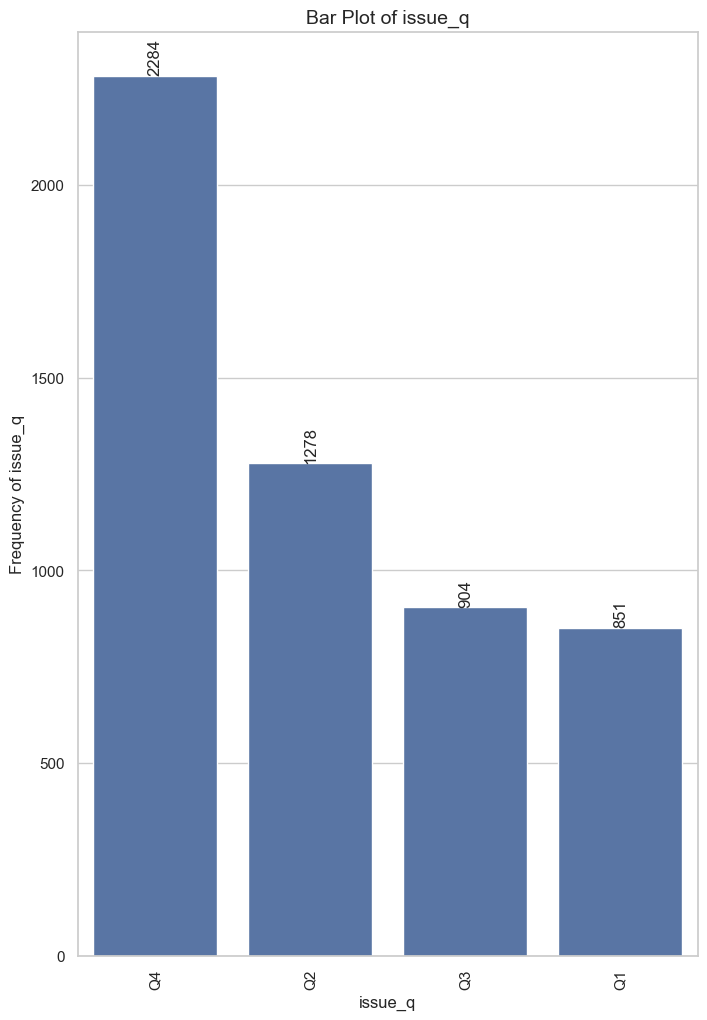

In [152]:
for cat_var in ['grade', 'sub_grade', 'term', 'emp_length', 'issue_y', 'issue_m', 'issue_q']:
    plot_bar_graph(
        loan_df,
        x_column = cat_var,
        y_column = cat_var,
        title = f'Bar Plot of {cat_var}',
        xlabel = cat_var,
        ylabel=f'Frequency of {cat_var}',
        figsize=(8, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )

#### 3.2.1.2. Unordered Categorical Variables

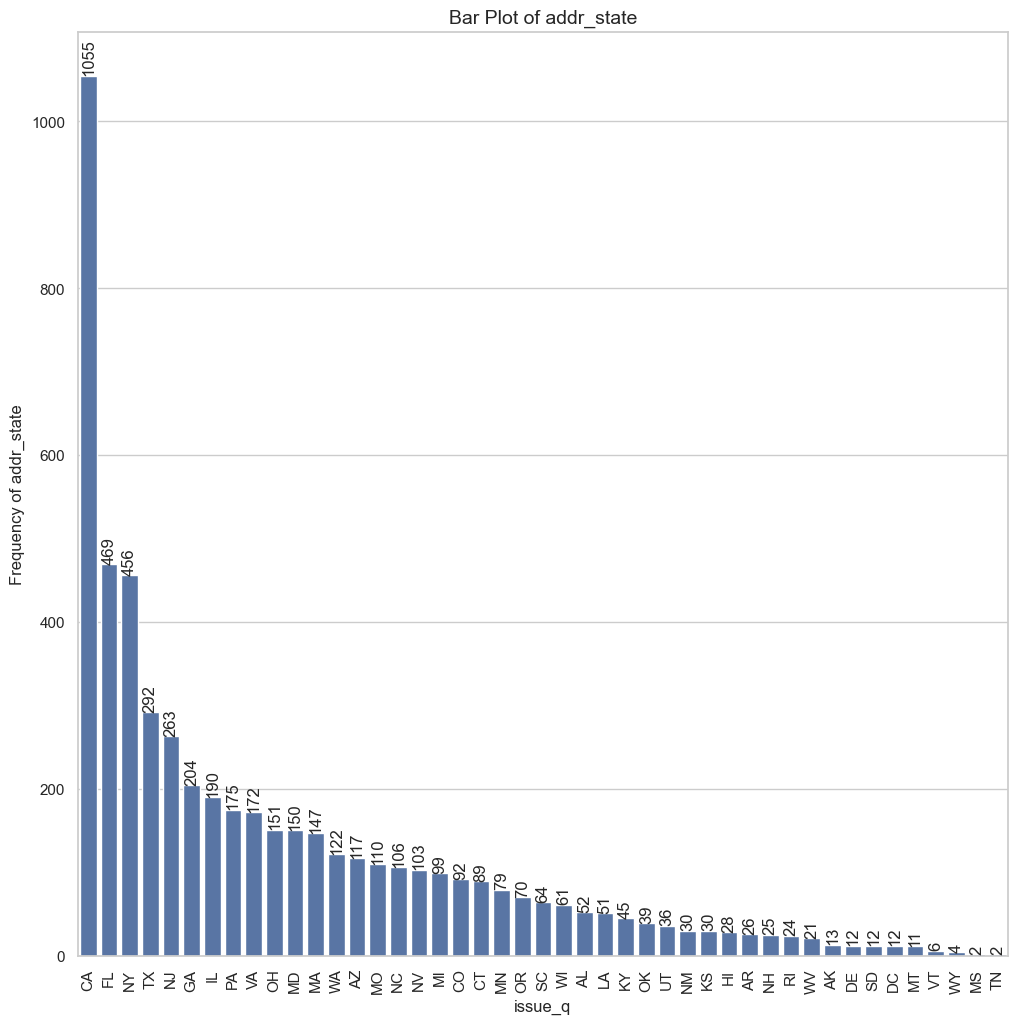

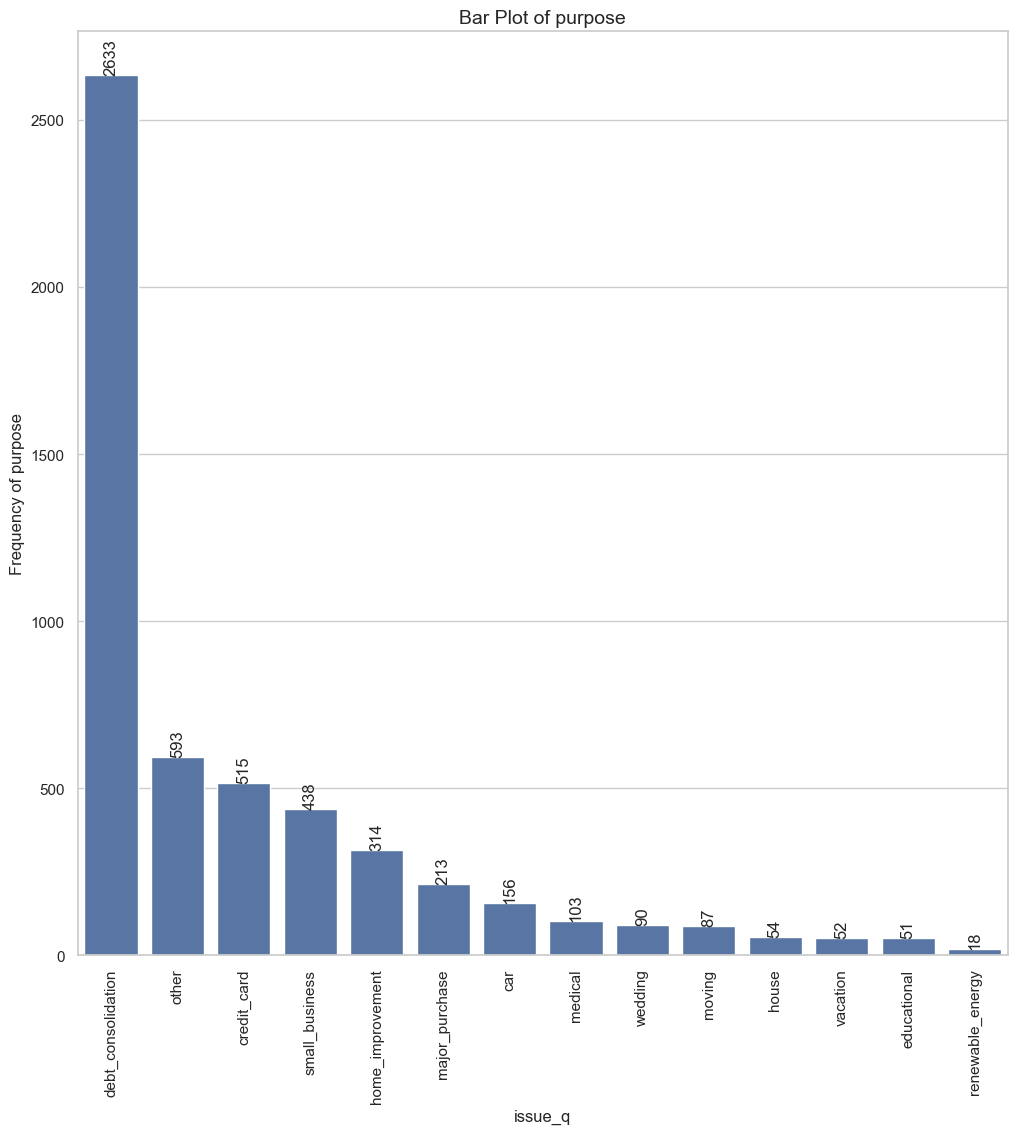

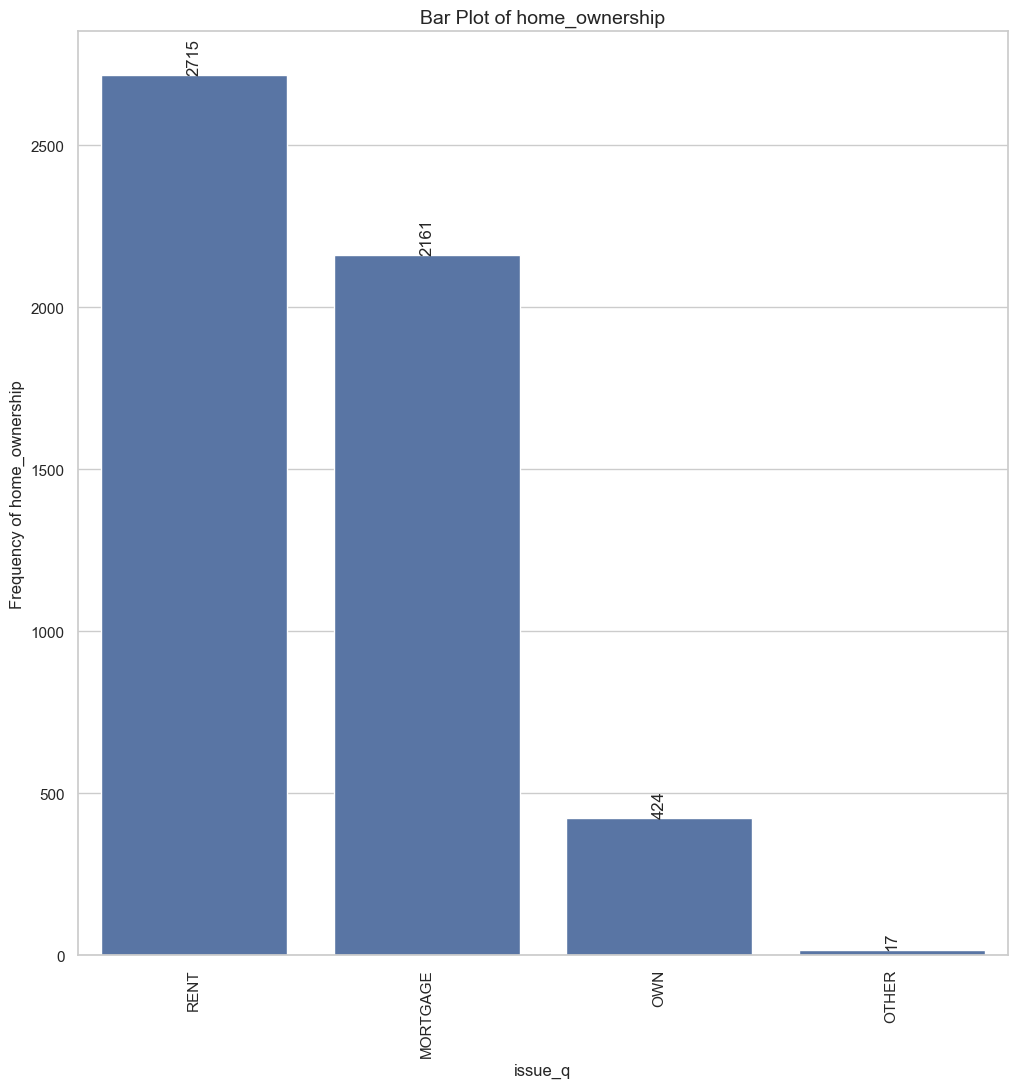

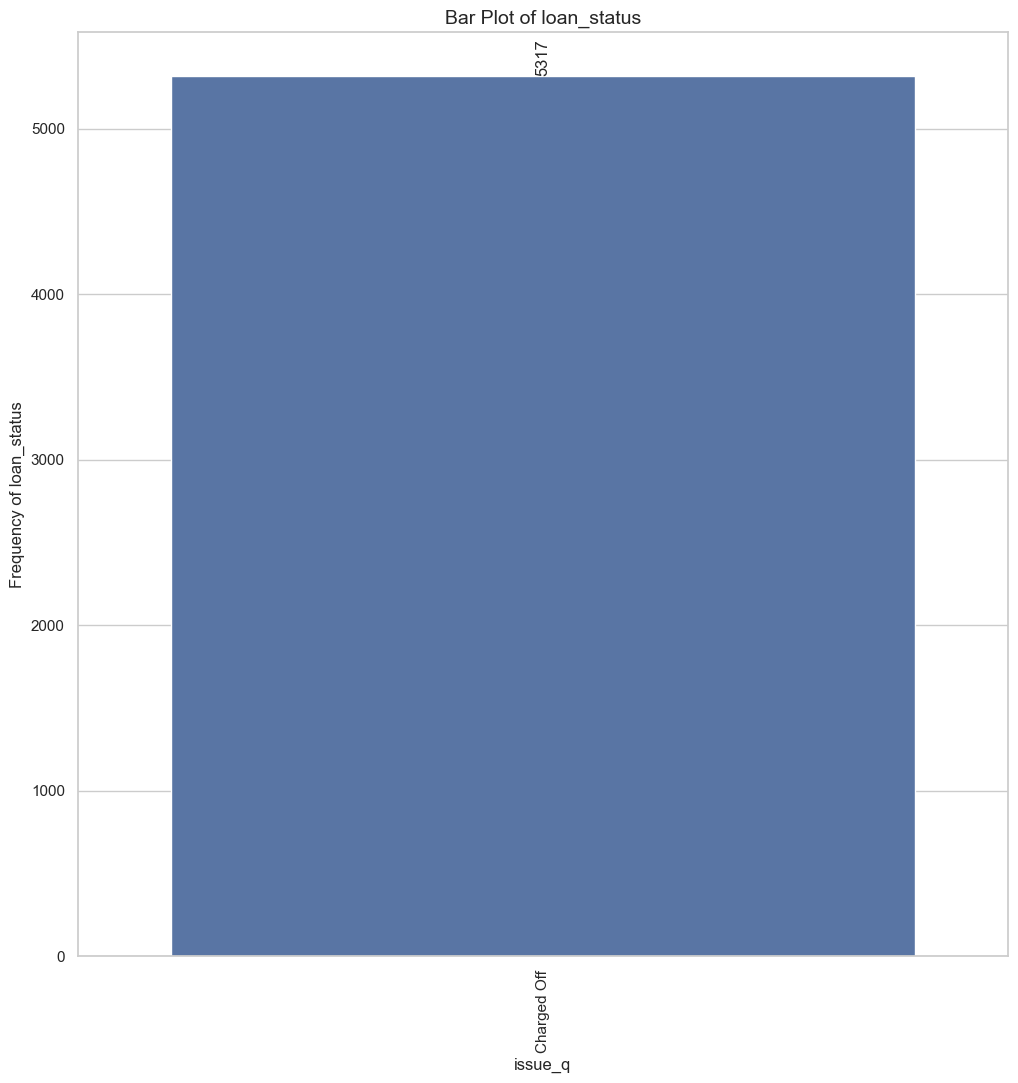

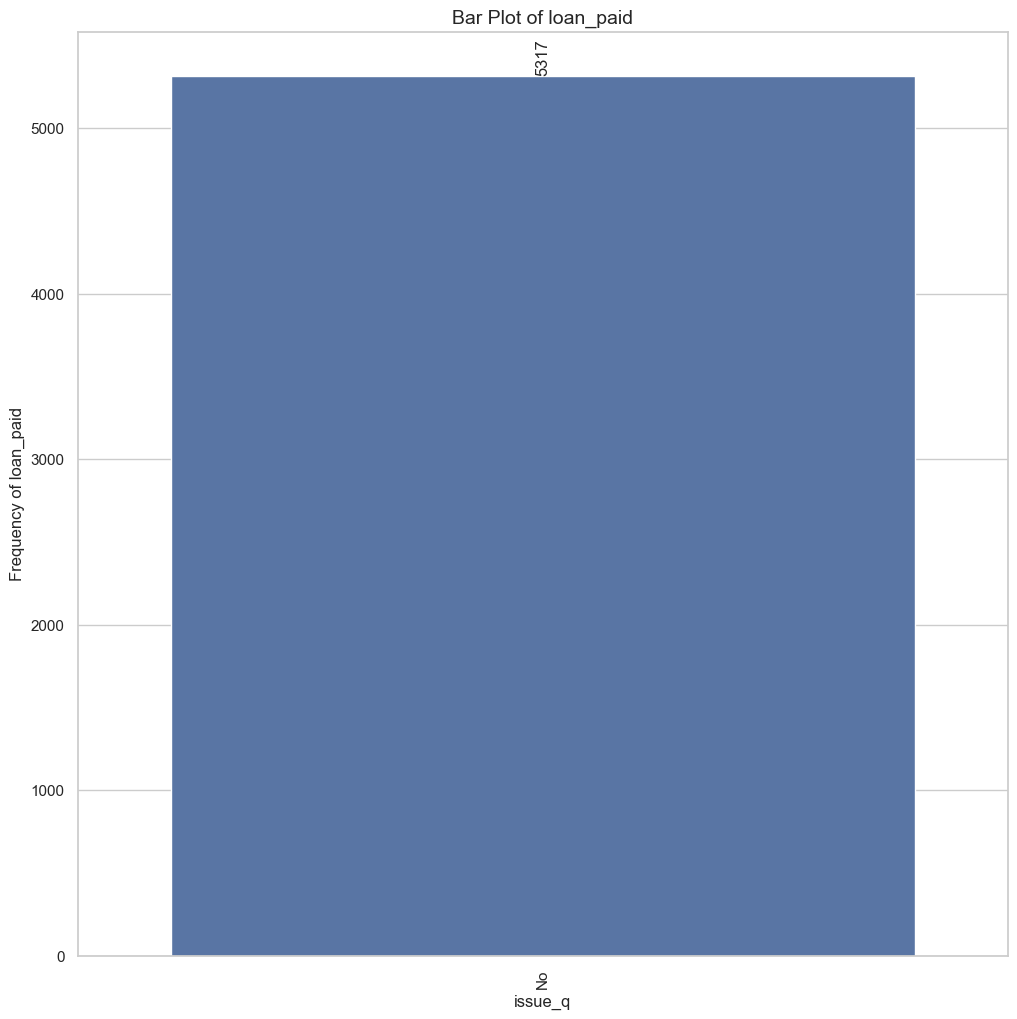

In [153]:
for un_cat_var in ['addr_state', 'purpose', 'home_ownership', 'loan_status', 'loan_paid']:
    plot_bar_graph(
        loan_df,
        x_column = un_cat_var,
        y_column = un_cat_var,
        title = f'Bar Plot of {un_cat_var}',
        xlabel = cat_var,
        ylabel=f'Frequency of {un_cat_var}',
        figsize=(12, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )

#### 3.2.2. Quantitative variables

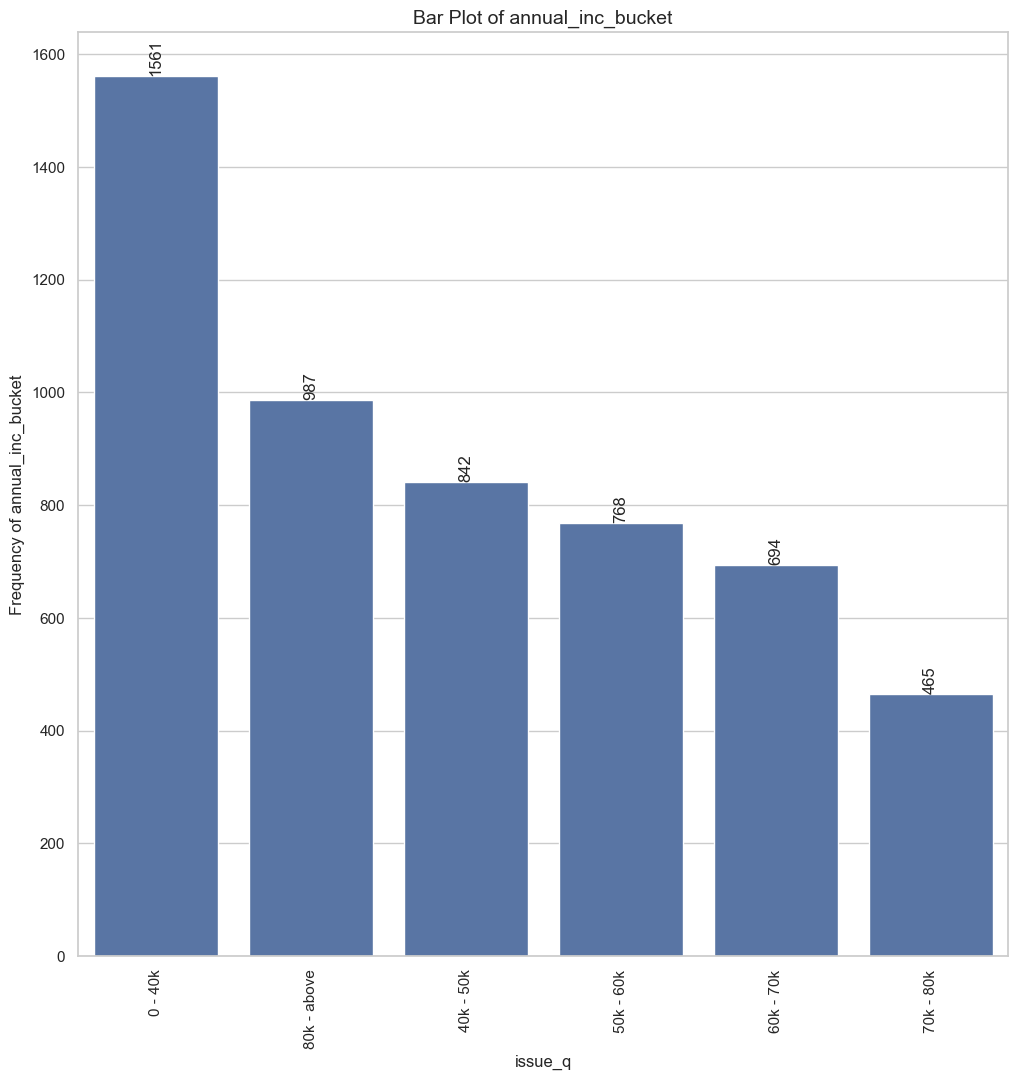

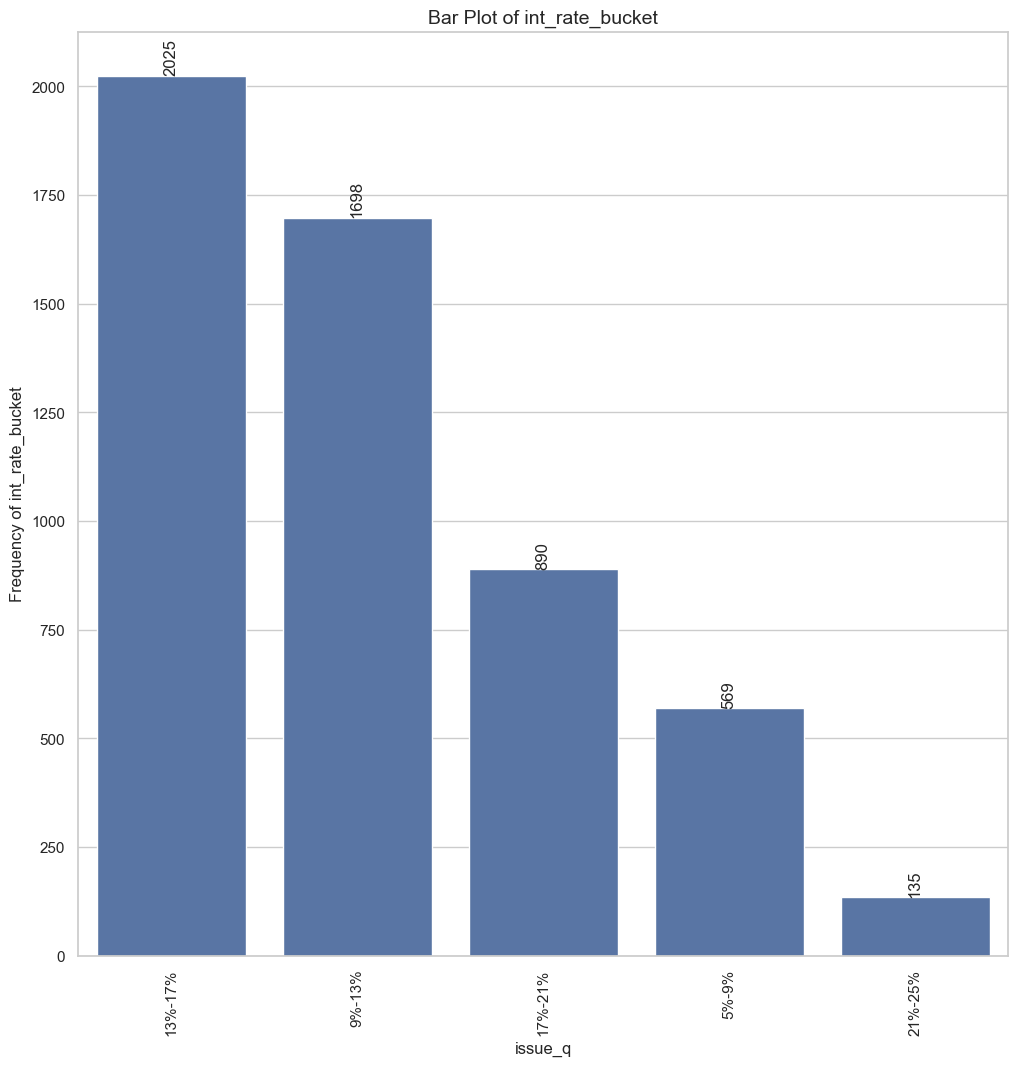

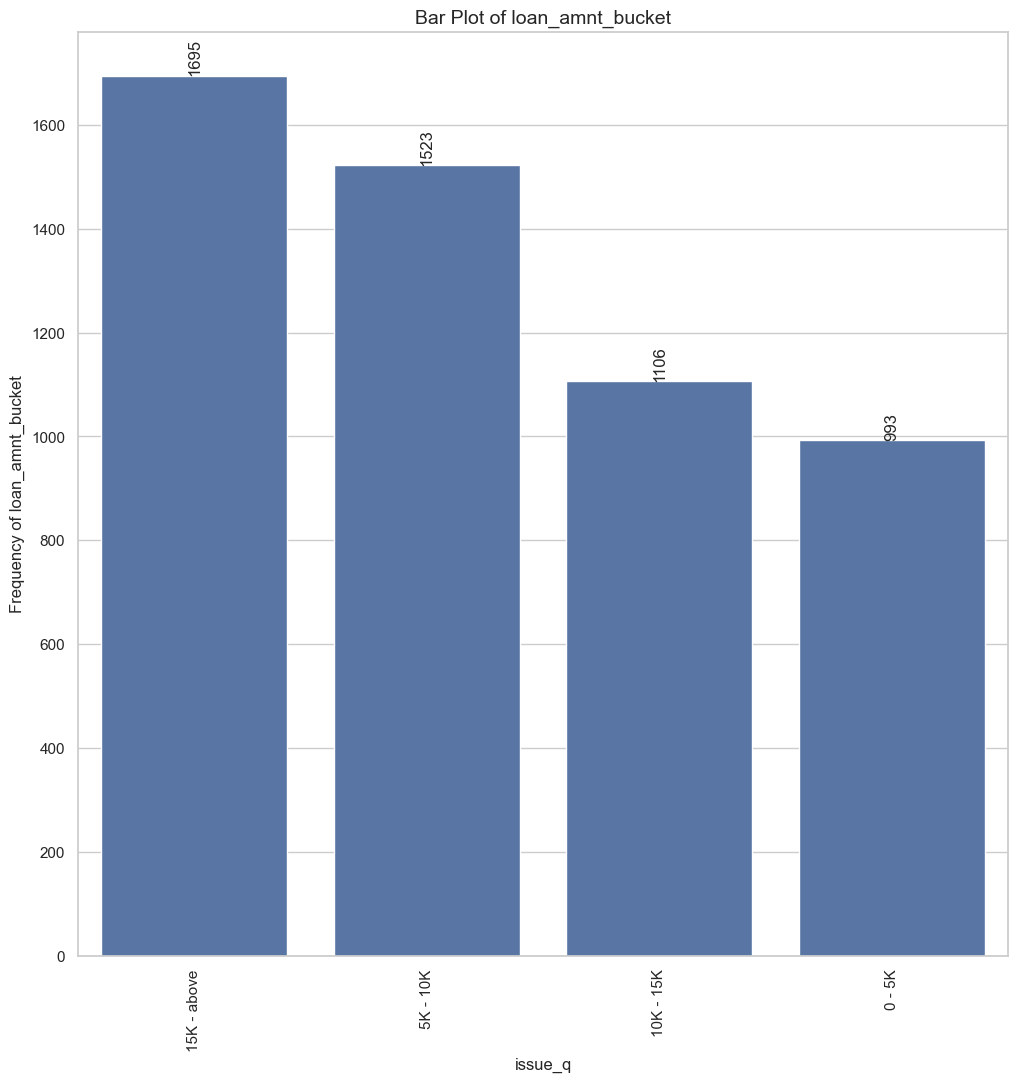

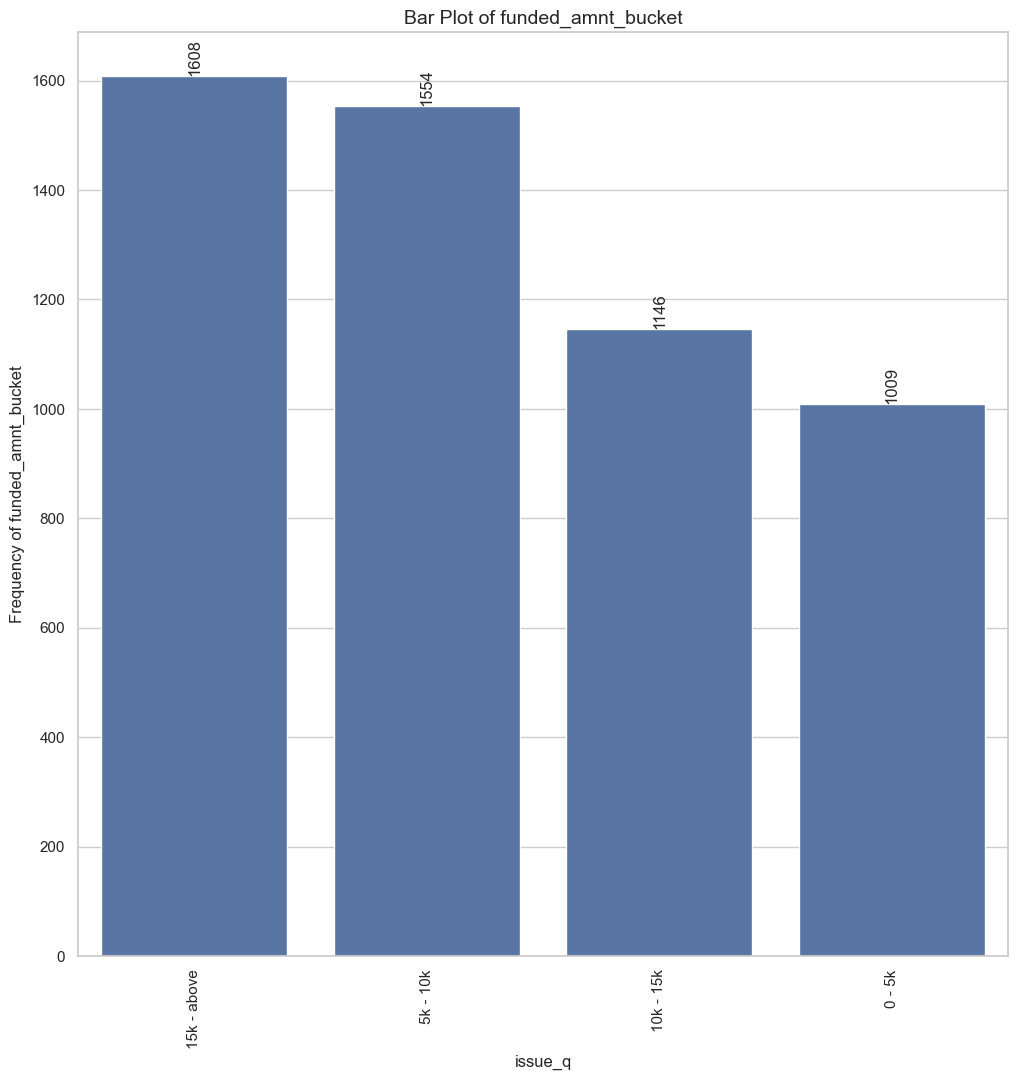

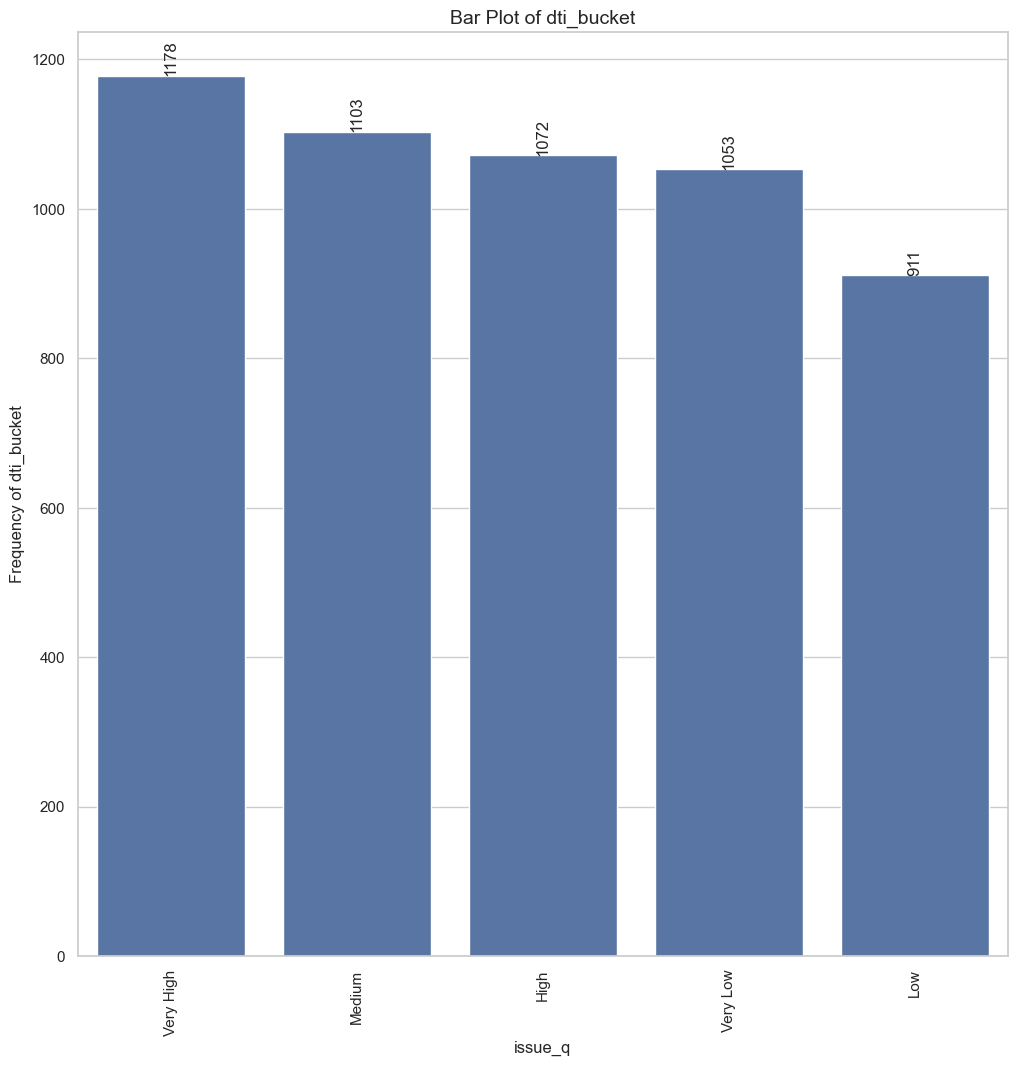

In [154]:
for quant_var in ['annual_inc_bucket', 'int_rate_bucket', 'loan_amnt_bucket', 'funded_amnt_bucket', 'dti_bucket']:
    plot_bar_graph(
        loan_df,
        x_column = quant_var,
        y_column = quant_var,
        title = f'Bar Plot of {quant_var}',
        xlabel = cat_var,
        ylabel=f'Frequency of {quant_var}',
        figsize=(12, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='loan_status',
        filter_value='Charged Off'
    )

In [155]:
installments_df = loan_df[loan_df.loan_paid == 'No']

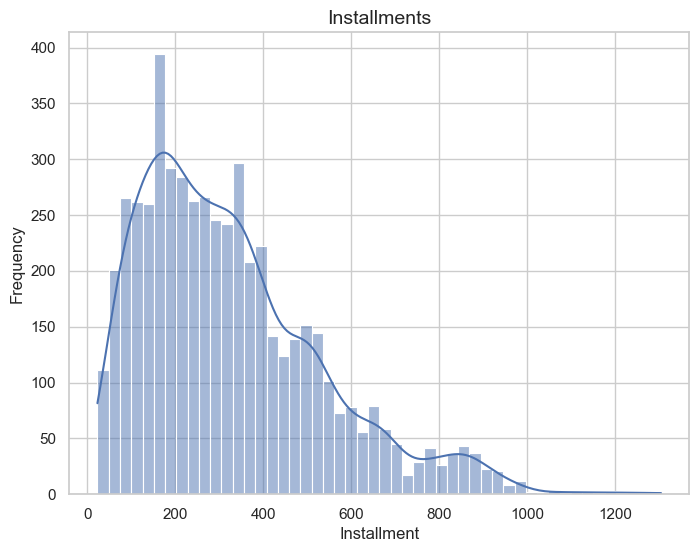

In [156]:
plot_histogram(installments_df, column='installment', bins=50, title='Installments', xlabel='Installment', ylabel='Frequency')



### Observations and Inferences from Univariate Analysis

#### Ordered Categorical Variables

- Grade B had the highest number of "Charged off" loan applicants, with a total of 1,352 applicants, indicating that applicants with this credit grade faced challenges in repaying their loans.

- Short-term loans with a duration of 36 months were the most popular among "Charged off" applicants, with 3,006 applications. This suggests that a significant portion of applicants who experienced loan default chose shorter repayment terms.

- Applicants who had been employed for more than 10 years accounted for the highest number of "Charged off" loans, totaling 1,474. This indicates that long-term employment history did not necessarily guarantee successful loan repayment.

- The year 2011 recorded the highest number of "Charged off" loan applications, totalling 3,152, signaling a positive trend in the number of applicants facing loan defaults over the years. This could be indicative of economic or financial challenges during that year.

- "Charged off" loans were predominantly taken during the 4th quarter, with 2,284 applications, primarily in December. This peak in loan applications during the holiday season might suggest that financial pressures during the holidays contributed to loan defaults.

#### Unordered Categorical Variables

- California had the highest number of "Charged off" loan applicants, with 1,055 applicants. For such applicants, the lending company needs to implement stricter eligibility criteria or credit assessments due to a higher number of "Charged off" applicants from this state.

- Debt consolidation was the primary loan purpose for most "Charged off" loan applicants, with 2,633 applicants selecting this option. The lending company needs to exercise caution when approving loans for debt consolidation purposes, as it was the primary loan purpose for many "Charged off" applicants.

- The majority of "Charged off" loan participants, totaling 2,715 individuals, lived in rented houses. The lending company must assess the financial stability of applicants living in rented houses, as they may be more susceptible to economic fluctuations.

- A significant number of loan participants, specifically 5,317 individuals, were loan defaulters, unable to clear their loans. The lending company should enhance risk assessment practices, including stricter credit checks and lower loan-to-value ratios, for applicants with a history of loan defaults. They should offer financial education and support services to help borrowers manage their finances and improve loan repayment outcomes.

#### Quantitative variables

- 1,561 loan applicants who charged off had annual salaries less than 40,000 USD. The lending company should exercise caution when lending to individuals with low annual salaries. They should implement rigorous income verification and assess repayment capacity more thoroughly for applicants in this income bracket.
- Among loan participants who charged off (2,025), a considerable portion belonged to the interest rate bucket of 13%-17%. To reduce the risk of default, the lending company should consider offering loans at lower interest rates when possible.
- 1,695 loan participants who charged off received loan amounts of 15,000 USD and above. The lending company should evaluate applicants seeking higher loan amounts carefully. They should ensure the applicants must have a strong credit history and repayment capability to handle larger loans.
- 1,608 loan participants who charged off received funded amounts of 15,000 USD and above. The lending company should ensure that the funded amounts align with the borrower's financial capacity. They should conduct thorough credit assessments for larger loan requests.
- Among loan participants who charged off, 1,178 loan applicants had very high debt-to-income ratios. The lending company should implement strict debt-to-income ratio requirements to prevent lending to individuals with unsustainable levels of debt relative to their income.
- Among loan participants who charged off, it's observed that the majority of them had monthly installment amounts falling within the range of 160-440 USD. The lending company should closely monitor and assess applicants with similar installment amounts to mitigate the risk of loan defaults.

### 3.3. Bivariate Analysis

Following fields will be analysed as part of bivariate analysis against Loan Status (`loan_status`) column

#### 1. Categorical variables
    1. Ordered categorical data
        1. Grade (grade)
        2. Sub grade (sub_grade)
        3. Term (36 / 60 months) (term)
        4. Employment length (emp_length)
        5. Issue year (issue_y)
        6. Issue month (issue_m)
        7. Issue quarter (issue_q)

    2. Unordered categorical data
        1. Loan purpose (purpose)
        2. Home Ownership (home_ownership)
        3. Verification Status (verification_status)
        4. Address State (addr_state)
        
#### 2. Quantitative variables
    1. Int Rate Bucket (int_rate_bucket)
    2. Debt to Income Bucket (dti_bucket)
    3. Annual Income Bucket (annual_inc_bucket)
    4. Funded Amount Bucket (funded_amnt_bucket)
    5. Loan Amount Bucket (loan_amnt_bucket)


### 3.3.1. Bivariate Analysis of Ordered Categorical Variables

#### 3.3.1.1.1. Grade vs. Loan Status

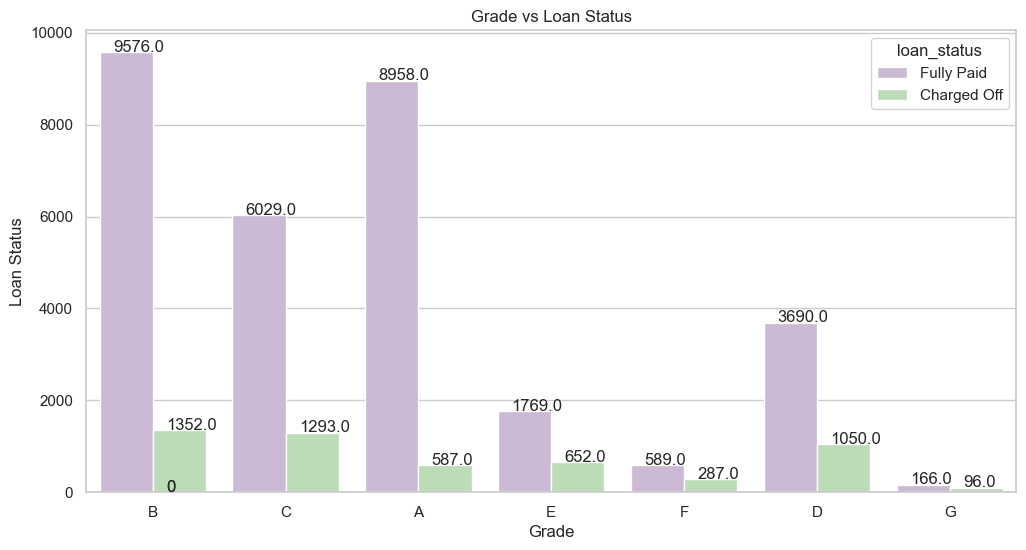

In [157]:
countplot_graph({
    'data': loan_df,
    'x': 'grade',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Grade',
    'ylabel': 'Loan Status',
    'title': 'Grade vs Loan Status',
    'palette': 'PRGn'
})

###### The loan applicants belonging to Grades B, C and D contribute to most number of "Charged Off" loans

#### 3.3.1.1.2. Sub Grade vs. Loan Status

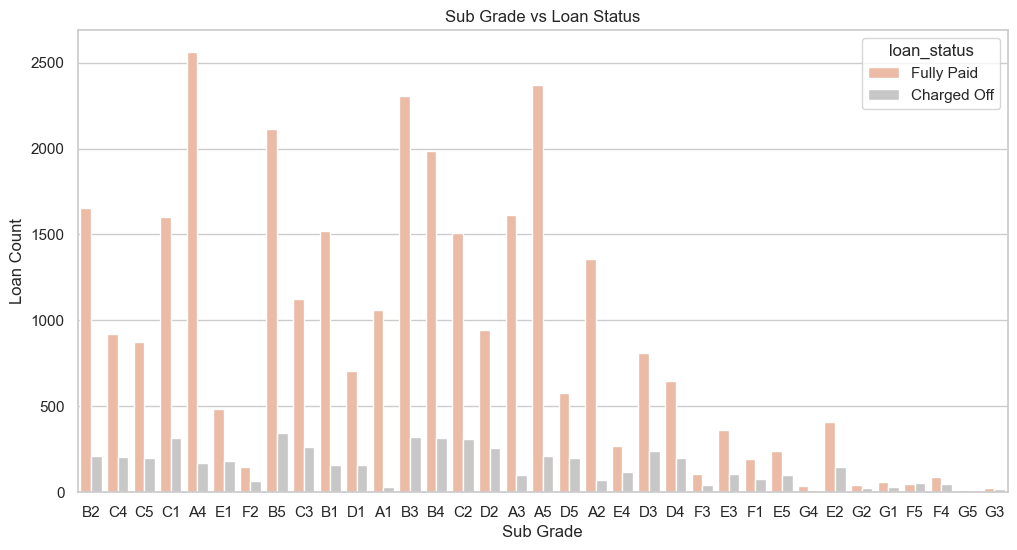

In [158]:
countplot_graph({
    'data': loan_df,
    'x': 'sub_grade',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Sub Grade',
    'ylabel': 'Loan Count',
    'title': 'Sub Grade vs Loan Status',
    'palette': 'RdGy'
}, annot = False)

###### Loan applicants belonging to Sub Grades B3, B4, and B5 are likely to Charge off

#### 3.3.1.1.3. Term vs. Loan Status

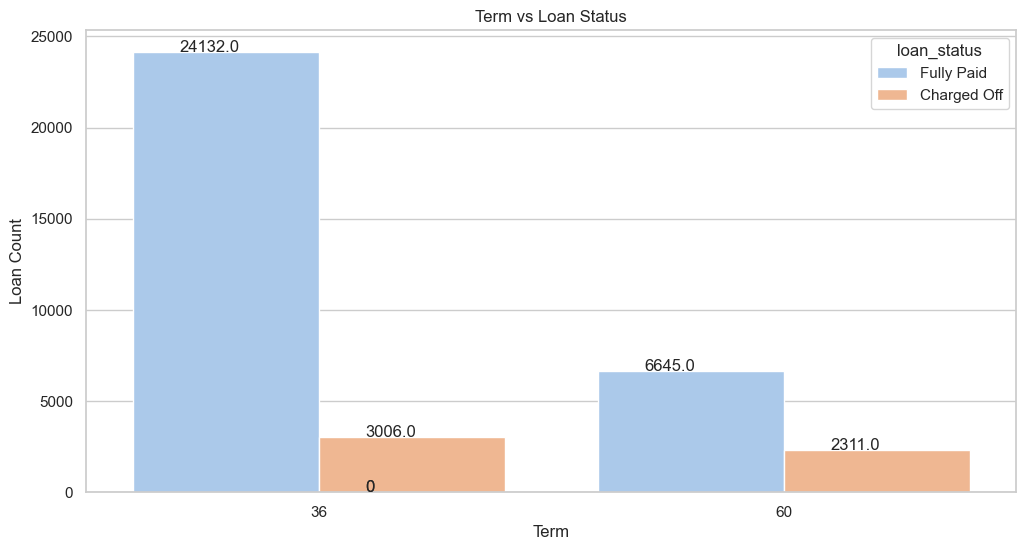

In [159]:
countplot_graph({
    'data': loan_df,
    'x': 'term',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Term',
    'ylabel': 'Loan Count',
    'title': 'Term vs Loan Status',
    'palette': 'pastel'
})

In [160]:
charged_off_percent_36_m = charged_off_percent(loan_df, 'term', 36)
charged_off_percent_60_m = charged_off_percent(loan_df, 'term', 60)
print(f'Charged off pecentage for people taking loan for 60 months - {charged_off_percent_60_m}%')
print(f'Charged off pecentage for people taking loan for 36 months - {charged_off_percent_36_m}%')

Charged off pecentage for people taking loan for 60 months - 25.8%
Charged off pecentage for people taking loan for 36 months - 11.08%


##### Loan applicants applying loan for 60 months are likely to default more than the one taking loan for 36 months

#### 3.3.1.1.4. Employment Length vs. Loan Status

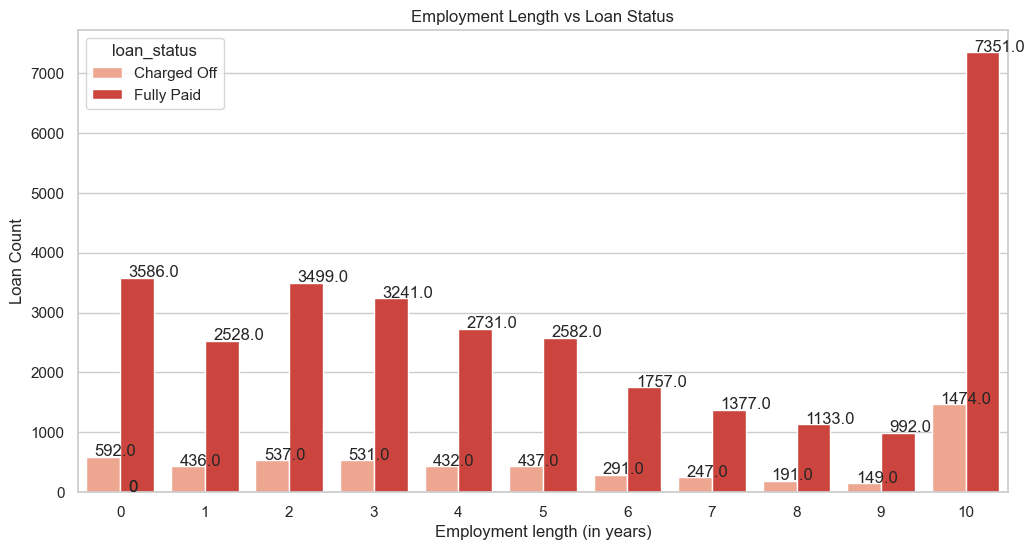

In [161]:
countplot_graph({
    'data': loan_df,
    'x': 'emp_length',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Employment length (in years)',
    'ylabel': 'Loan Count',
    'title': 'Employment Length vs Loan Status',
    'palette': "Reds"
})

###### Most number of loan applicants are 10 or more years of experience. They also are the ones who are most likely to default

#### 3.3.1.1.5. Loan Year vs. Loan Status

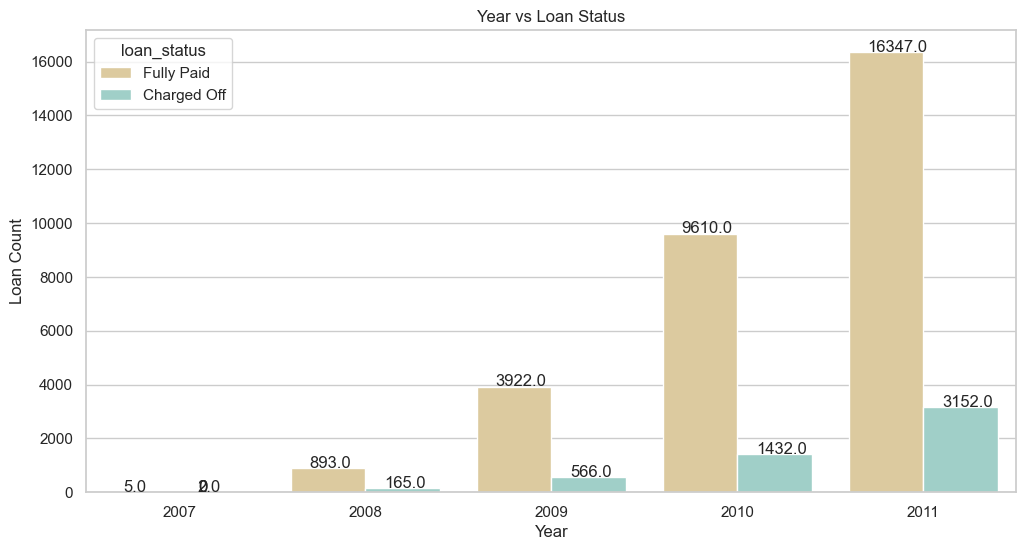

In [162]:
countplot_graph({
    'data': loan_df,
    'x': 'issue_y',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Year',
    'ylabel': 'Loan Count',
    'title': 'Year vs Loan Status',
    'palette': "BrBG"
})

###### The loan applicants have increased steadily from 2007 to 2011 showcasing positive trend in the upcoming years.

#### 3.3.1.1.6. Loan Month vs. Loan Status

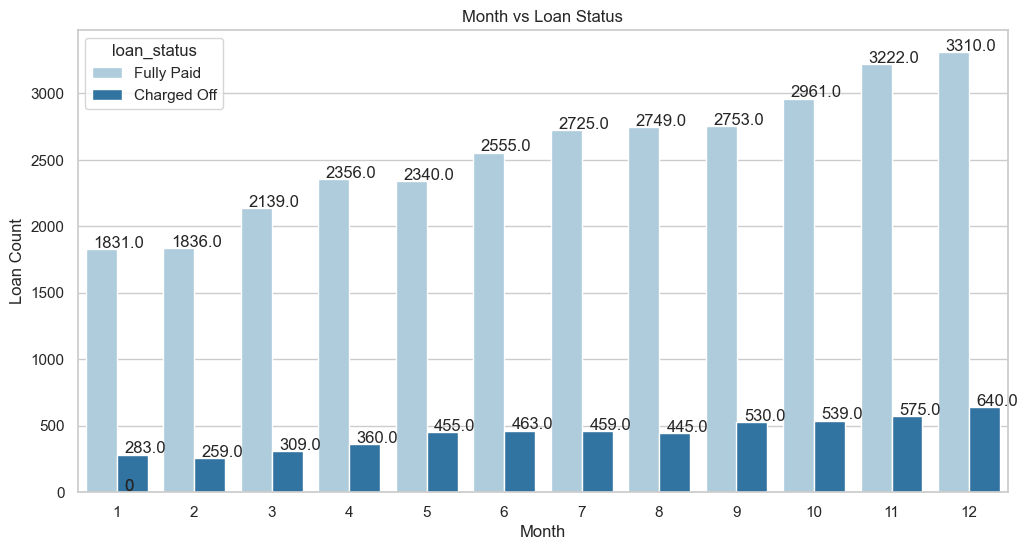

In [163]:
countplot_graph({
    'data': loan_df,
    'x': 'issue_m',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Month',
    'ylabel': 'Loan Count',
    'title': 'Month vs Loan Status',
    'palette': "Paired"
})

###### The month of December is the most preferred month of taking loans. This may be due to the holiday season.

#### 3.3.1.1.7. Loan Quarter vs. Loan Status

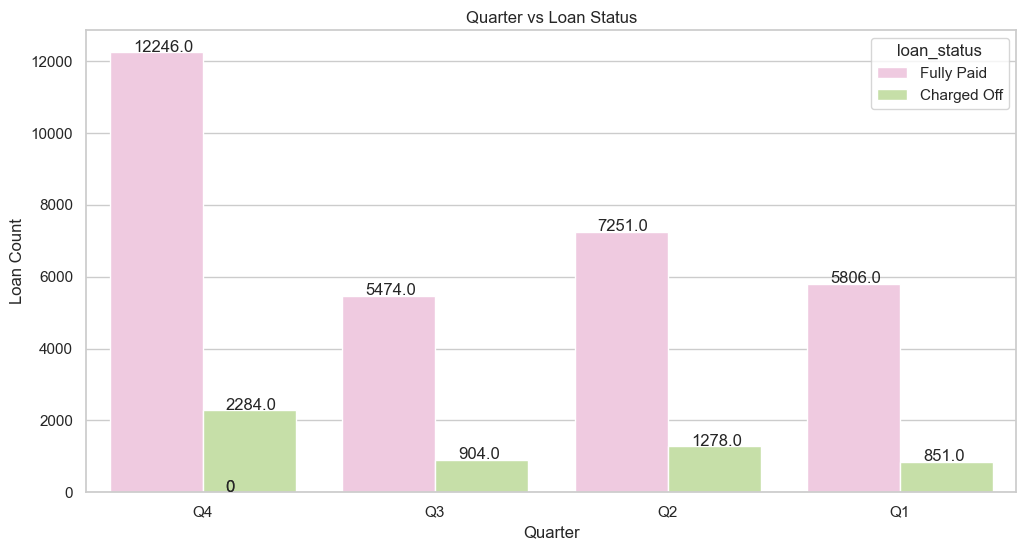

In [164]:
countplot_graph({
    'data': loan_df,
    'x': 'issue_q',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Quarter',
    'ylabel': 'Loan Count',
    'title': 'Quarter vs Loan Status',
    'palette': "PiYG"
})

###### Q4 is the most preferred quarter for taking loans. This is mainly due to the holiday season coming up.

### 3.3.2. Bivariate Analysis of Unordered Categorical Variables

#### 3.3.1.2.1 Purpose vs. Loan Status

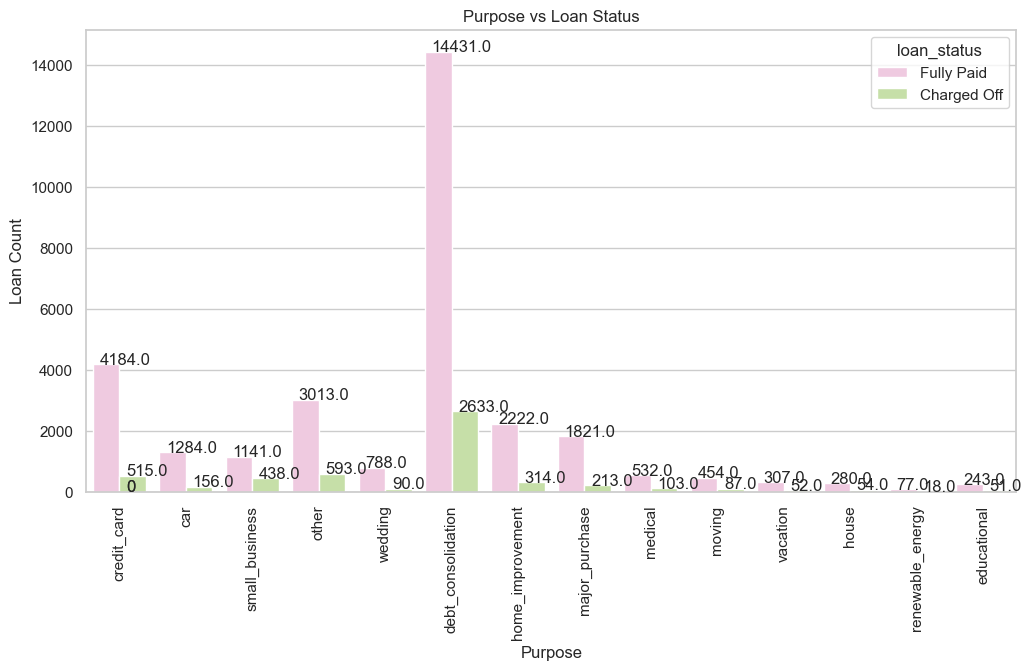

In [165]:
countplot_graph({
    'data': loan_df,
    'x': 'purpose',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Purpose',
    'ylabel': 'Loan Count',
    'title': 'Purpose vs Loan Status',
    'palette': "PiYG",
    'x_tick_rotation': 90
})

###### Debt consolidation is the category where maximum loans are issued and people have defaulted the most in the same category.

#### 3.3.1.2.2. Home Ownership vs. Loan Status

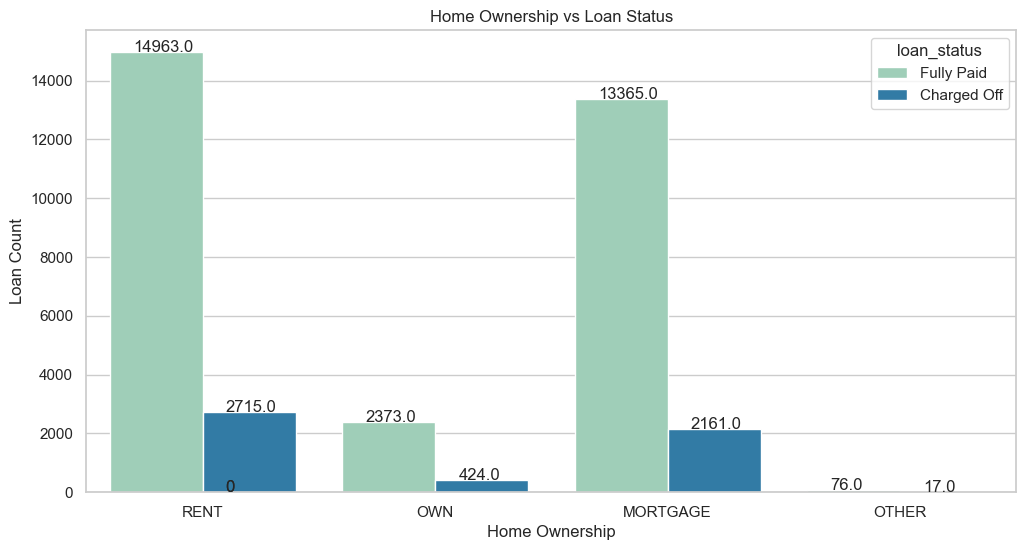

In [166]:
countplot_graph({
    'data': loan_df,
    'x': 'home_ownership',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Home Ownership',
    'ylabel': 'Loan Count',
    'title': 'Home Ownership vs Loan Status',
    'palette': "YlGnBu"
})

###### The loan applicants who live in a rented or mortgaged house are more likely to default

#### 3.3.1.2.3. Verification Status vs. Loan Status

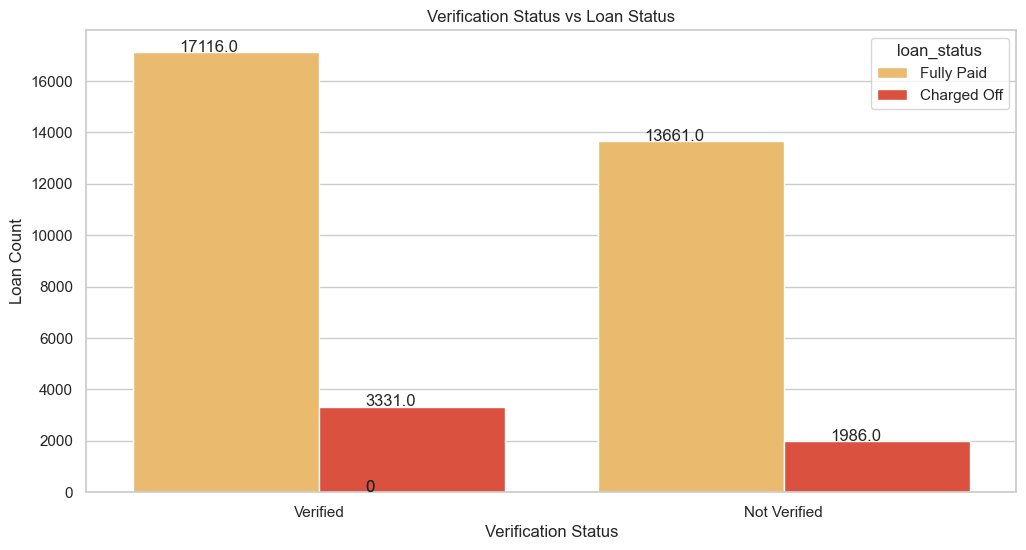

In [167]:
countplot_graph({
    'data': loan_df,
    'x': 'verification_status',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Verification Status',
    'ylabel': 'Loan Count',
    'title': 'Verification Status vs Loan Status',
    'palette': "YlOrRd"
})

###### The loan applicants who have been verified are defaulting more than the applicants who are not verified

#### 3.3.1.2.4. Address State vs. Loan Status

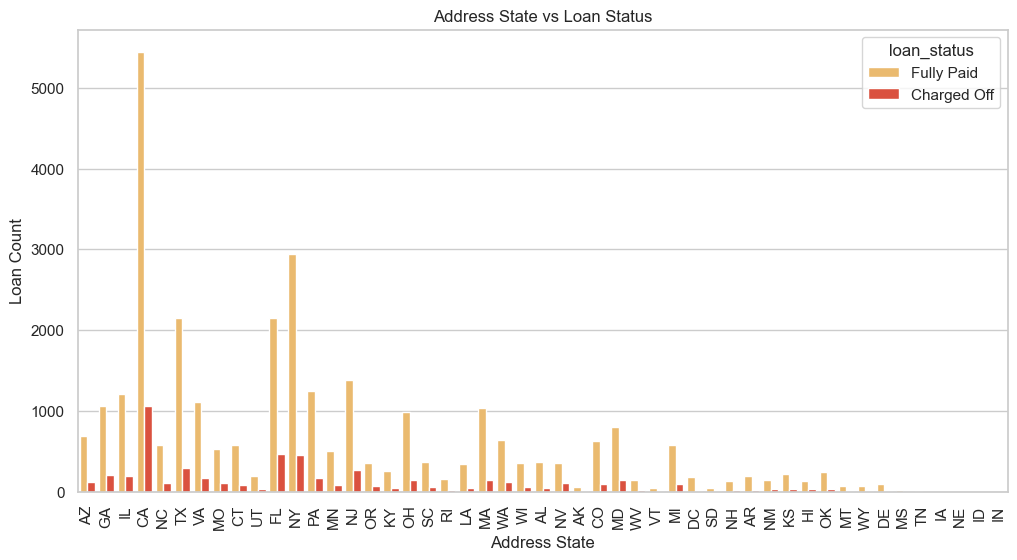

In [168]:
countplot_graph({
    'data': loan_df,
    'x': 'addr_state',
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': 'Address State',
    'ylabel': 'Loan Count',
    'title': 'Address State vs Loan Status',
    'palette': "YlOrRd",
    'x_tick_rotation': 90
}, annot=False)

###### Loan applicants from the state of California (CA), Florida (FL), and New York (NY) are most likely to default

### 3.3.2. Bivariate Analysis of Quantitative Variables

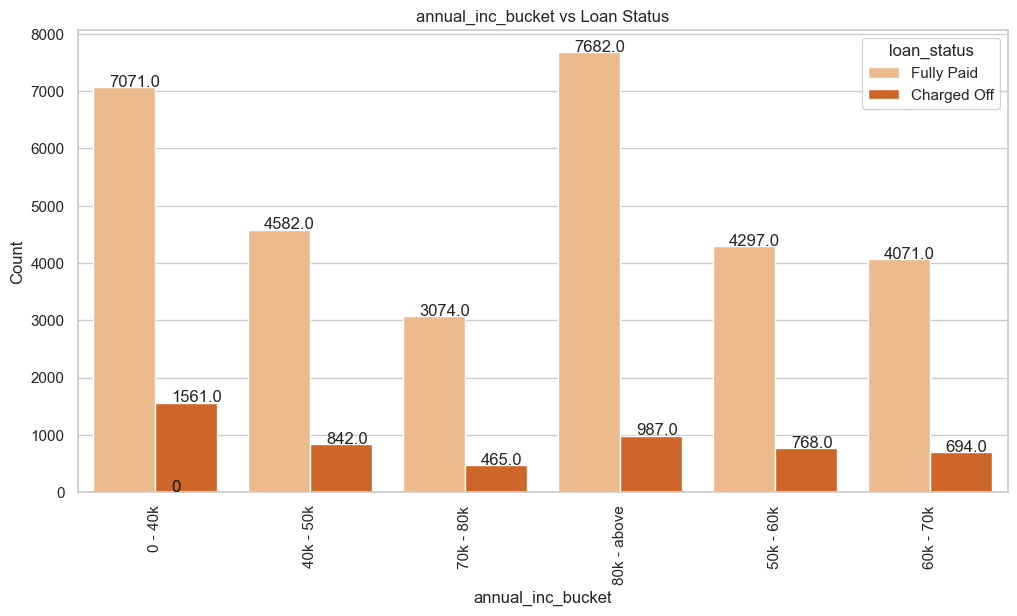

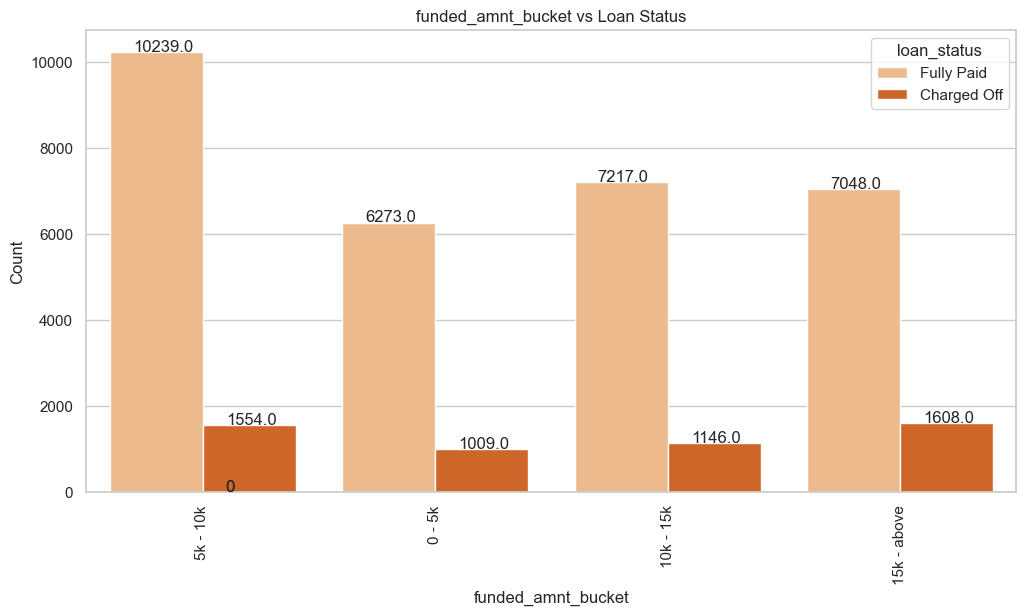

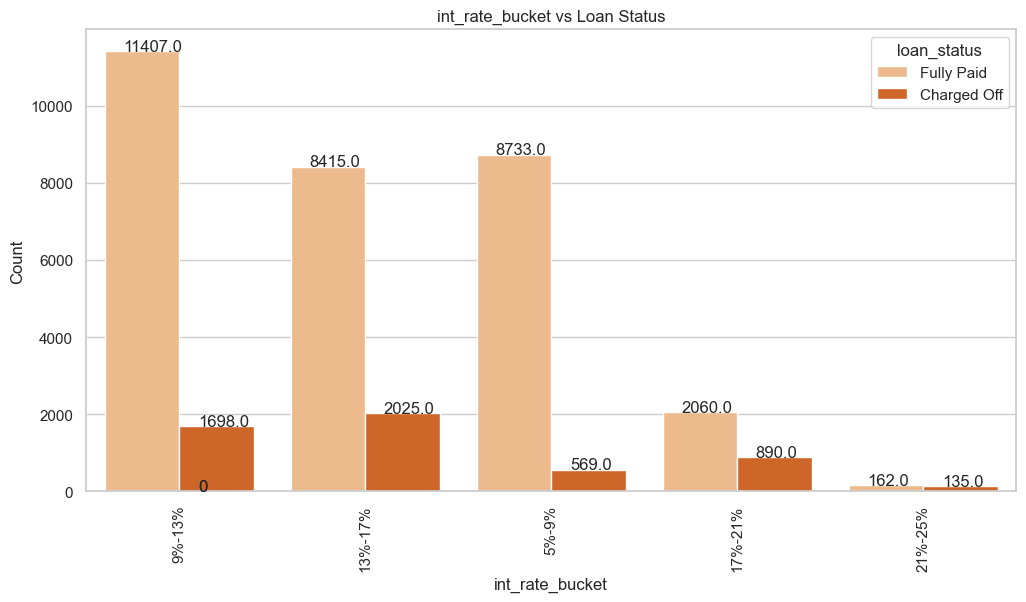

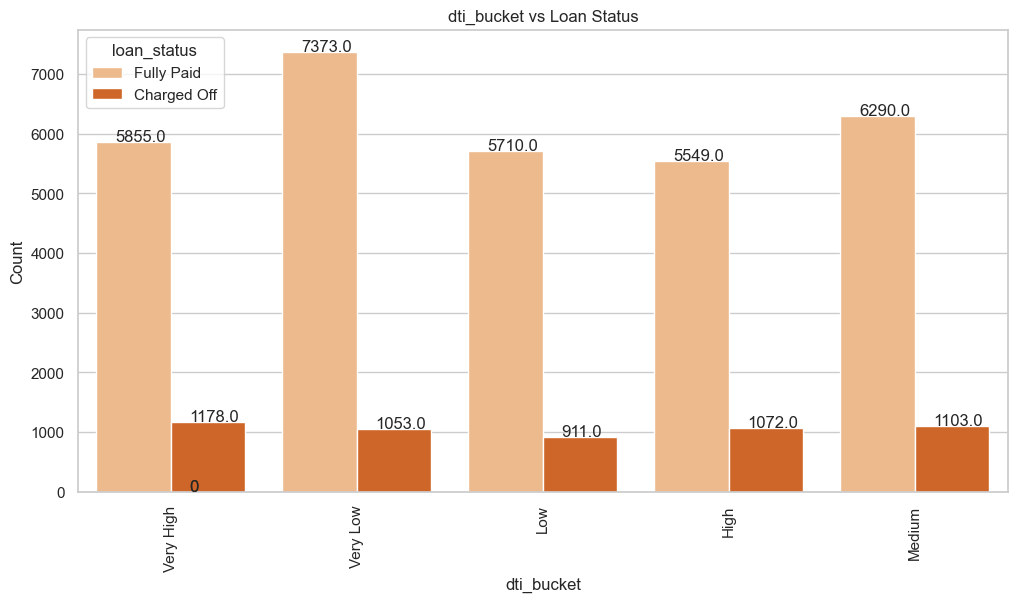

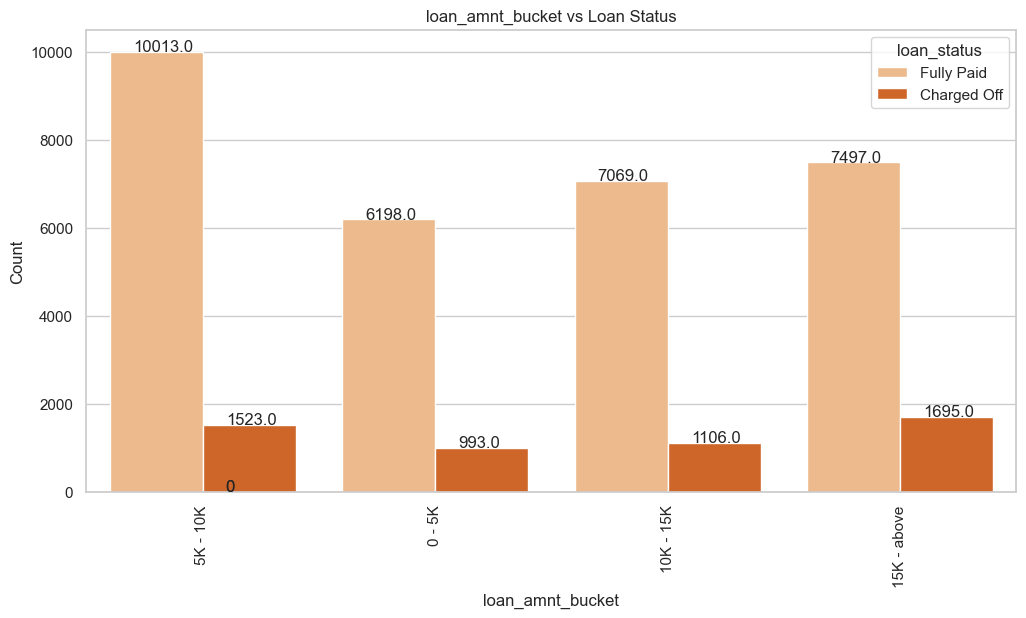

In [169]:
for col in ['annual_inc_bucket', 'funded_amnt_bucket', 'int_rate_bucket', 'dti_bucket', 'loan_amnt_bucket']:
    countplot_graph({
    'data': loan_df,
    'x': col,
    'figsize': (12, 6),
    'hue': 'loan_status',
    'xlabel': col,
    'ylabel': 'Count',
    'title': f'{col} vs Loan Status',
    'palette': "Oranges",
    'x_tick_rotation': 90
}, annot=True)

#### Observations from Bivariate Analysis of Quantitative Variables

- A majority of the loan applicants who defaulted received loan amounts of $15,000 or higher.

- The majority of loan applicants who charged off had significantly high Debt-to-Income (DTI) ratios.

- A significant portion of loan applicants who defaulted received loans with interest rates falling within the range of 13% to 17%.

- A majority of the loan applicants who charged off reported an annual income of less than $40,000.

### Summary of Bivariate Analysis

1. The loan applicants belonging to Grades B, C, and D contribute to most of the "Charged Off" loans.

2. Loan applicants belonging to Sub Grades B3, B4, and B5 are more likely to charge off.

3. Loan applicants applying for loans with a 60-month term are more likely to default than those taking loans for 36 months.

4. Most loan applicants have ten or more years of experience, and they are also the most likely to default.

5. The number of loan applicants has steadily increased from 2007 to 2011, indicating a positive trend in the upcoming years.

6. December is the most preferred month for taking loans, possibly due to the holiday season.

7. The fourth quarter (Q4) is the most preferred quarter for taking loans, primarily because of the upcoming holiday season.

8. Debt consolidation is the category where the maximum number of loans are issued, and people have defaulted the most in the same category.

9. Loan applicants who live in rented or mortgaged houses are more likely to default.

10. Verified loan applicants are defaulting more than those who are not verified.

11. Loan applicants from the states of California (CA), Florida (FL), and New York (NY) are most likely to default.

12. A majority of the loan applicants who defaulted received loan amounts of $15,000 or higher.

13. The majority of loan applicants who charged off had significantly high Debt-to-Income (DTI) ratios.

14. A significant portion of loan applicants who defaulted received loans with interest rates falling within the range of 13% to 17%.

15. A majority of the loan applicants who charged off reported an annual income of less than $40,000.


### Inferences of Bivariate Analysis

1. **Risk Assessment for Grades B, C, and D**: Since loan applicants from Grades B, C, and D contribute to most of the "Charged Off" loans, the company should consider implementing stricter risk assessment and underwriting criteria for applicants falling into these grades.

2. **Subgrades B3, B4, and B5**: Pay special attention to applicants with Subgrades B3, B4, and B5, as they are more likely to charge off. Implementing additional risk mitigation measures or offering them lower loan amounts could be considered.

3. **Term Length**: Given that applicants opting for 60-month loans are more likely to default, the company should consider evaluating the risk associated with longer-term loans and potentially limiting the maximum term or adjusting interest rates accordingly.

4. **Experience and Default Probability**: Loan applicants with ten or more years of experience are more likely to default. This suggests that experience alone may not be a reliable indicator of creditworthiness. The company should use a more comprehensive credit scoring system that factors in other risk-related attributes.

5. **Positive Growth Trend**: The steady increase in the number of loan applicants from 2007 to 2011 indicates growth in the market. The company can capitalize on this trend by maintaining a competitive edge in the industry while keeping risk management practices robust.

6. **Seasonal Trends**: December and Q4 are peak periods for loan applications, likely due to the holiday season. The company should anticipate increased demand during these periods and ensure efficient processing to meet customer needs.

7. **Debt Consolidation Risk**: Since debt consolidation is the category with the maximum number of loans and high default rates, the company should carefully evaluate applicants seeking debt consolidation loans and potentially adjust interest rates or offer financial counseling services.

8. **Housing Status and Default Risk**: Applicants living in rented or mortgaged houses are more likely to default. This information can be considered in the underwriting process to assess housing stability and its impact on repayment ability.

9. **Verification Process**: Verified loan applicants are defaulting more than those who are not verified. The company should review its verification process to ensure it effectively assesses applicant creditworthiness and consider improvements or adjustments.

10. **Geographic Risk**: Loan applicants from states like California (CA), Florida (FL), and New York (NY) are more likely to default. The company should monitor regional risk trends and adjust lending strategies or rates accordingly in these areas.

11. **High Loan Amounts**: Applicants receiving loan amounts of $15,000 or higher are more likely to default. The company can mitigate this risk by conducting more thorough assessments for larger loan requests and potentially capping loan amounts for higher-risk applicants.

12. **DTI and Interest Rates**: High Debt-to-Income (DTI) ratios and interest rates in the 13%-17% range are associated with defaults. The company should review its interest rate determination process and consider adjusting rates based on DTI ratios to better align with the borrower's ability to repay.

13. **Low Annual Income**: Applicants with annual incomes less than $40,000 have a higher likelihood of defaulting. The company should consider offering financial education resources or setting maximum loan amounts based on income levels to ensure affordability for borrowers.


## 4. Correlation Analysis

In [170]:
correlation_df = loan_df.copy()
# Dropping columns which are irrelevant to analysis
correlation_df = correlation_df.drop(['issue_y', 'issue_m'], axis = 1)

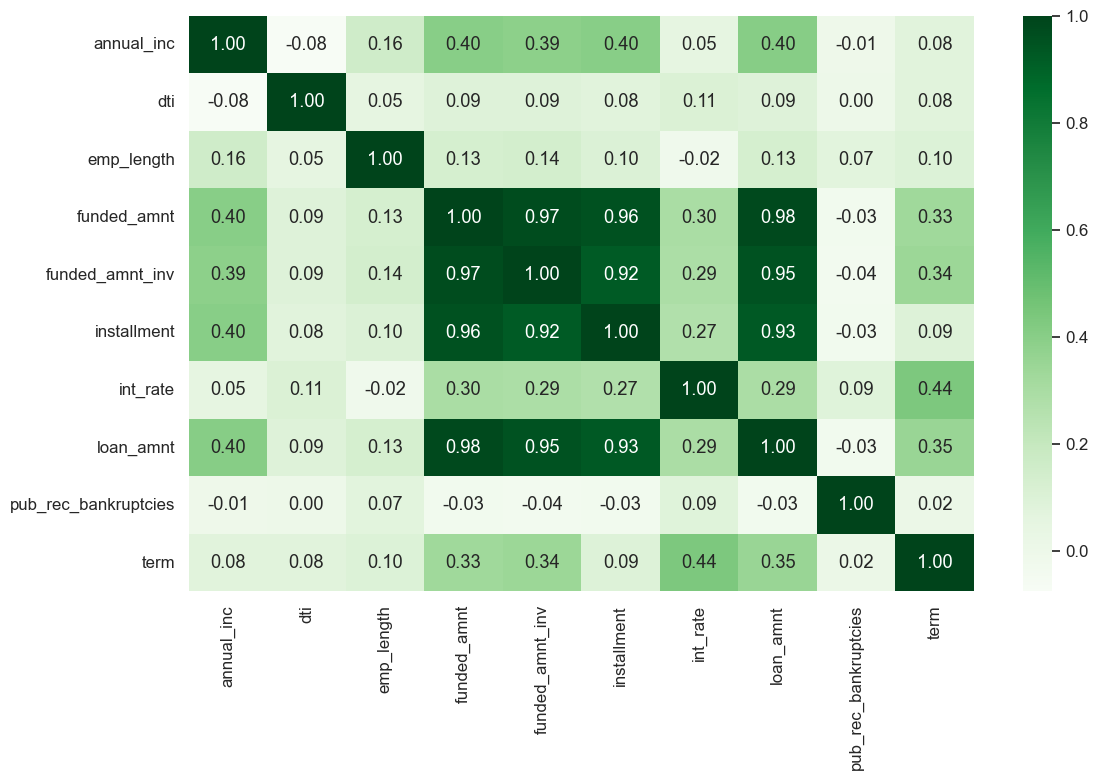

In [171]:
numeric_df = correlation_df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.set(font_scale=1.1)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Greens", cbar=True)
plt.tight_layout()
plt.show()

## Inferences from Correlation Metrics

**Strong Correlation**
- `installment` has a strong correlation with funded_amnt, loan_amnt, and funded_amnt_inv
- `term` has a strong correlation with interest rate
- `annual_inc` has a strong correlation with loan_amount


**Weak Correlation**
- `dti` has weak correlation with most of the fields
- `emp_length` has weak correlation with most of the fields


**Negative Correlation**
- `pub_rec_bankrupticies` has a negative correlation with almost every field
- `annual_inc` has a negative correlation with dti


## 5. Multivariate Analysis

###### Multivariate analysis is done for below columns against loan status and the charged off percentage

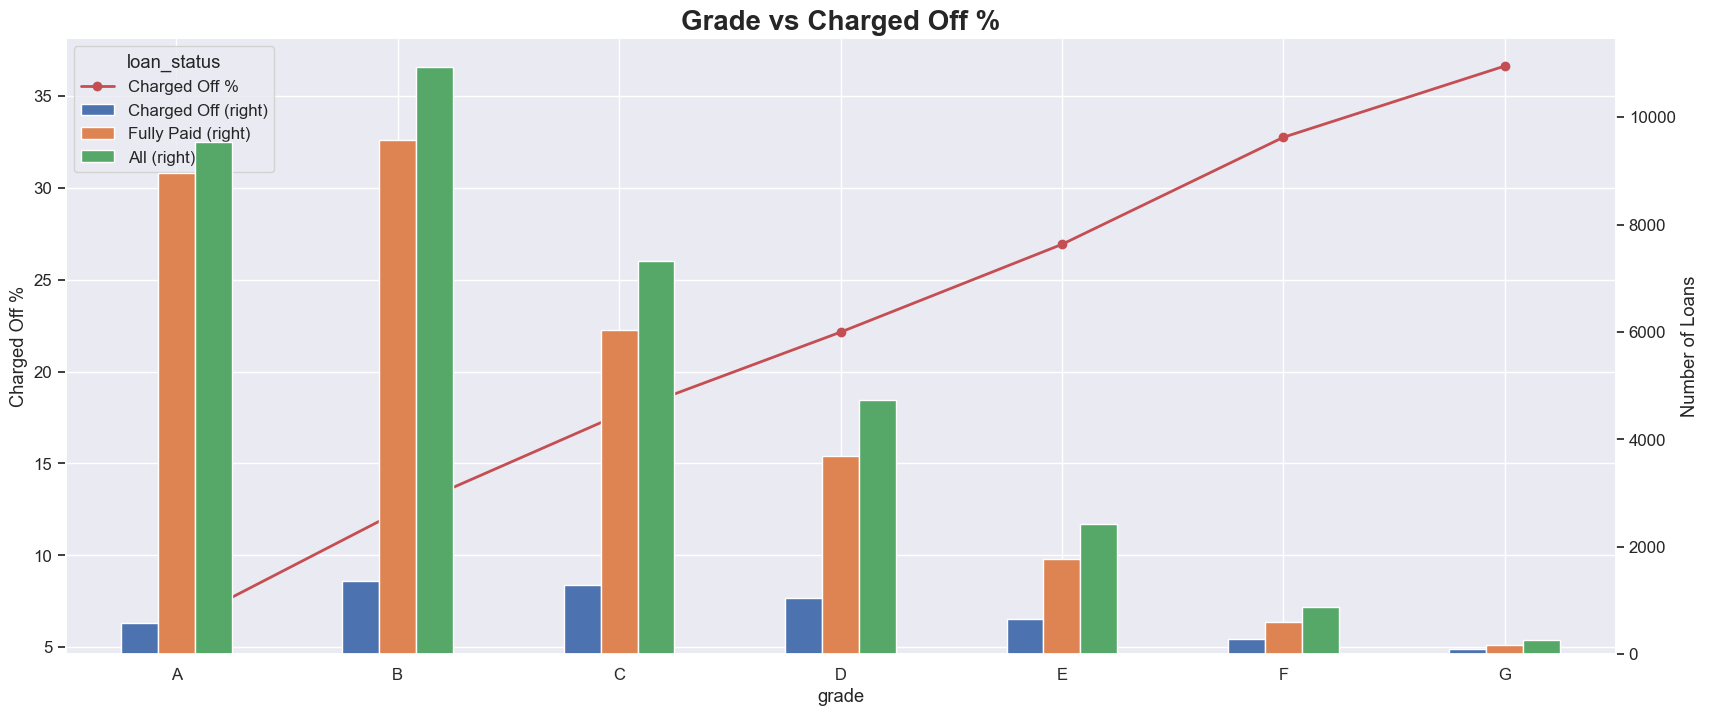

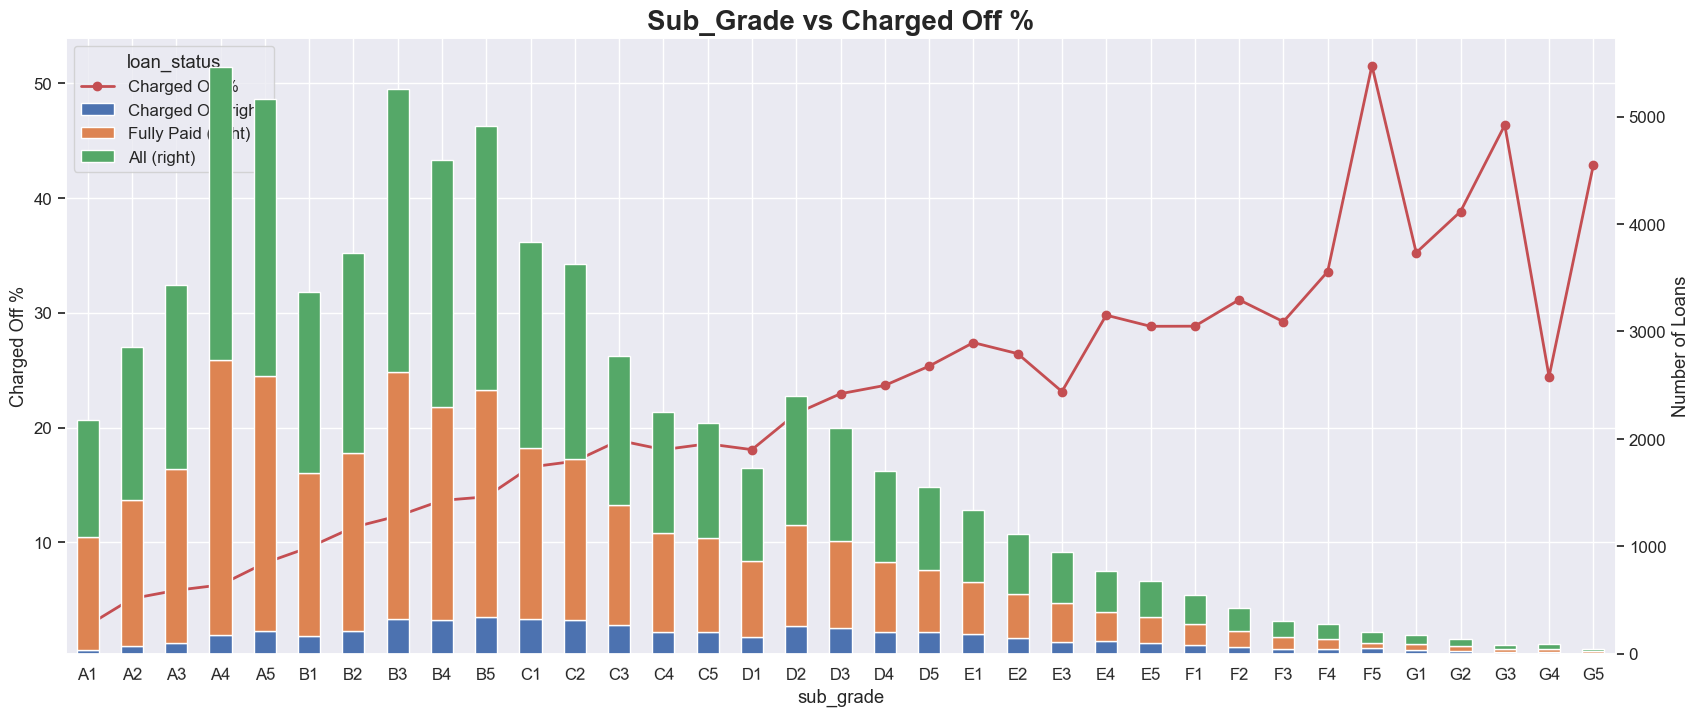

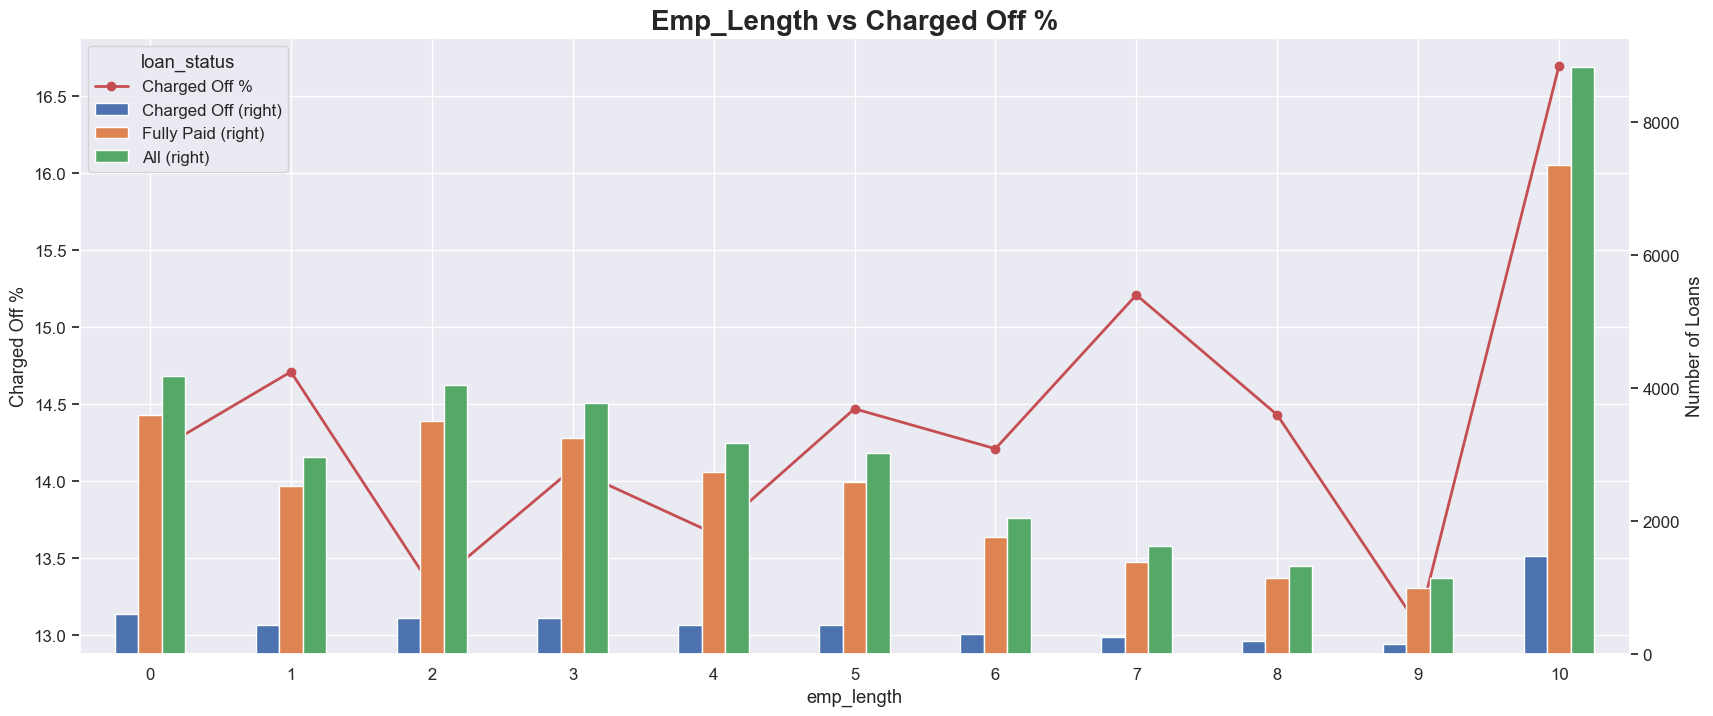

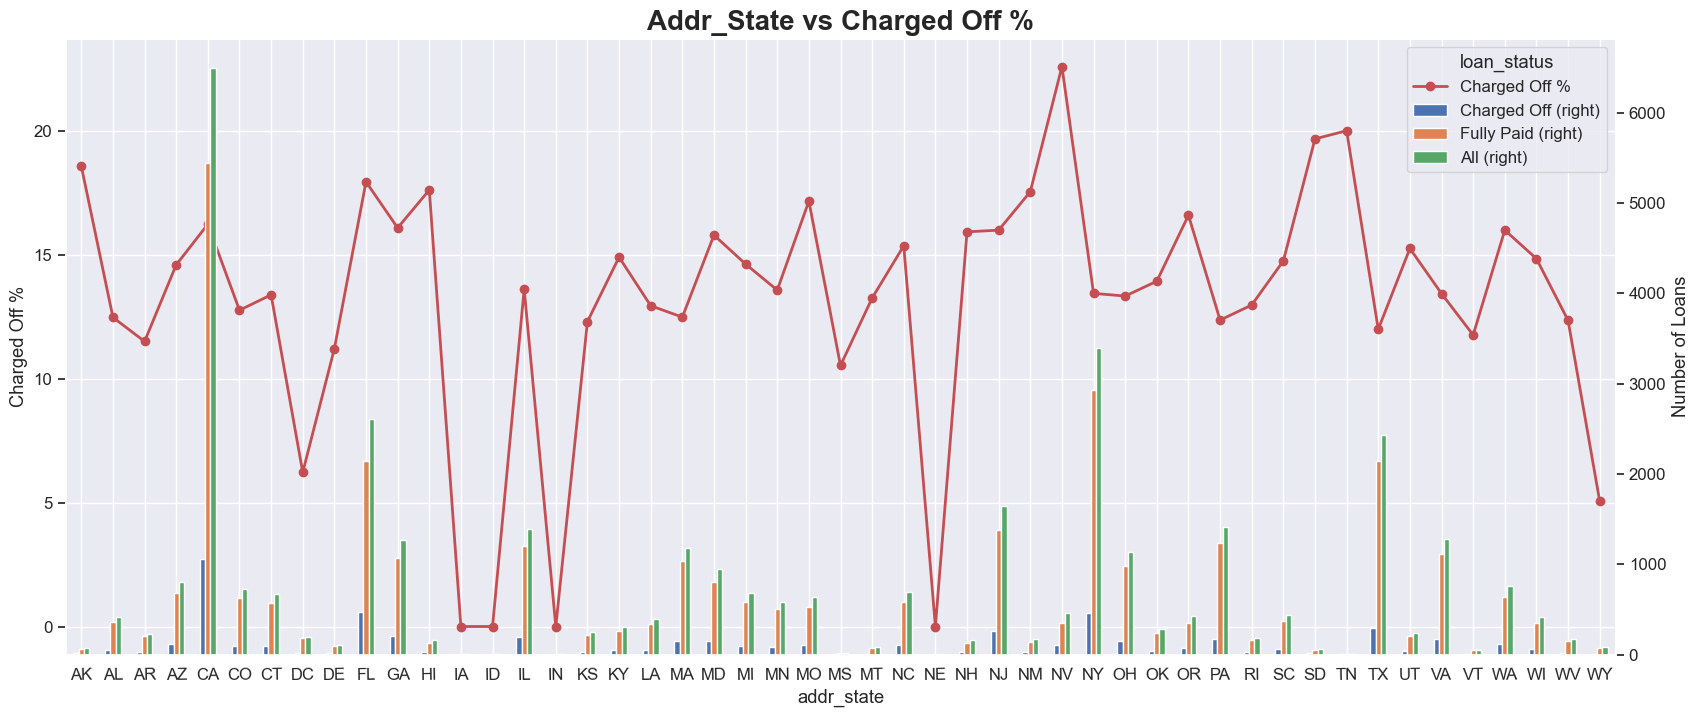

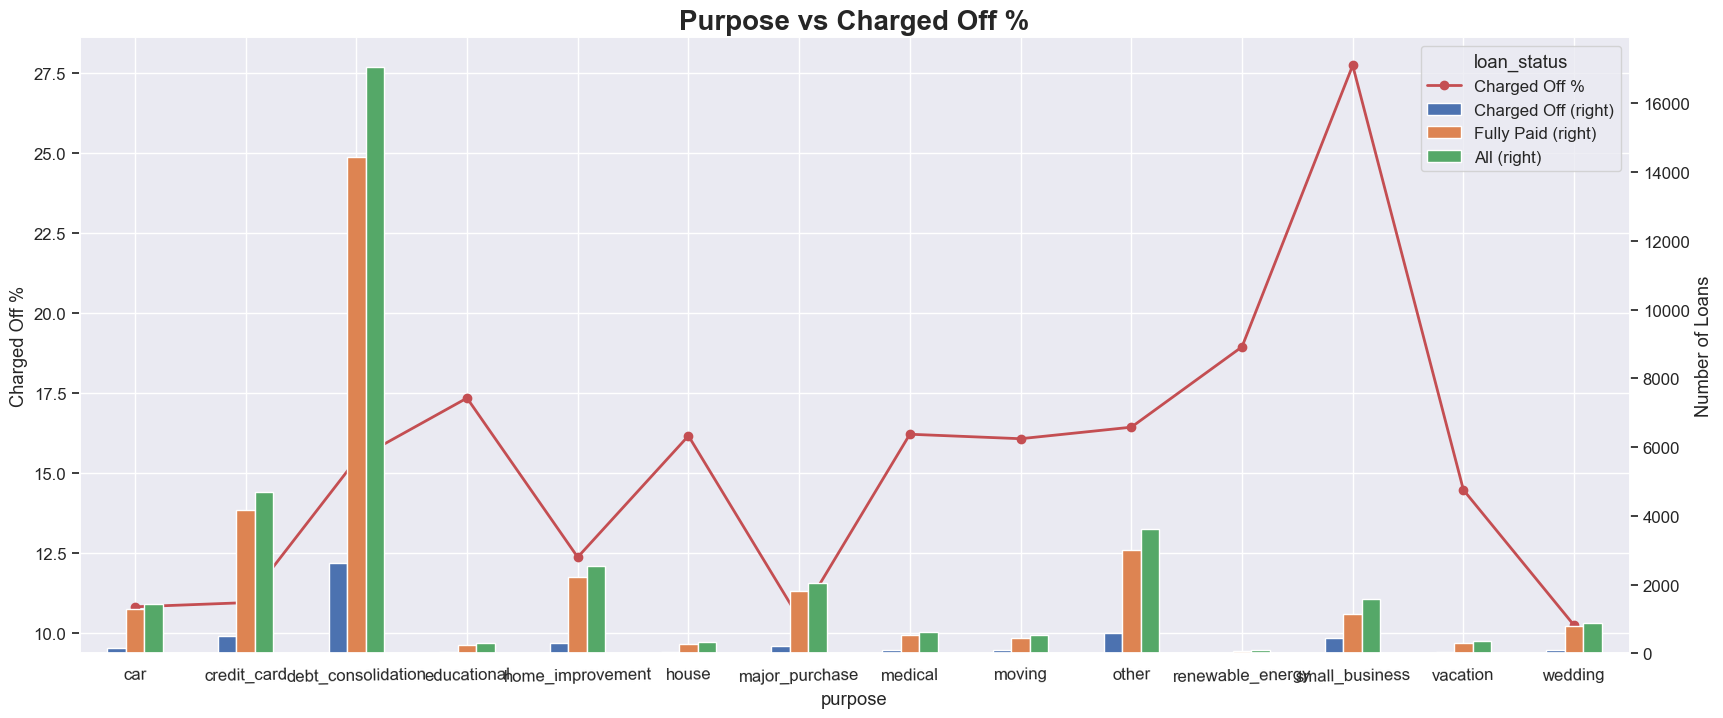

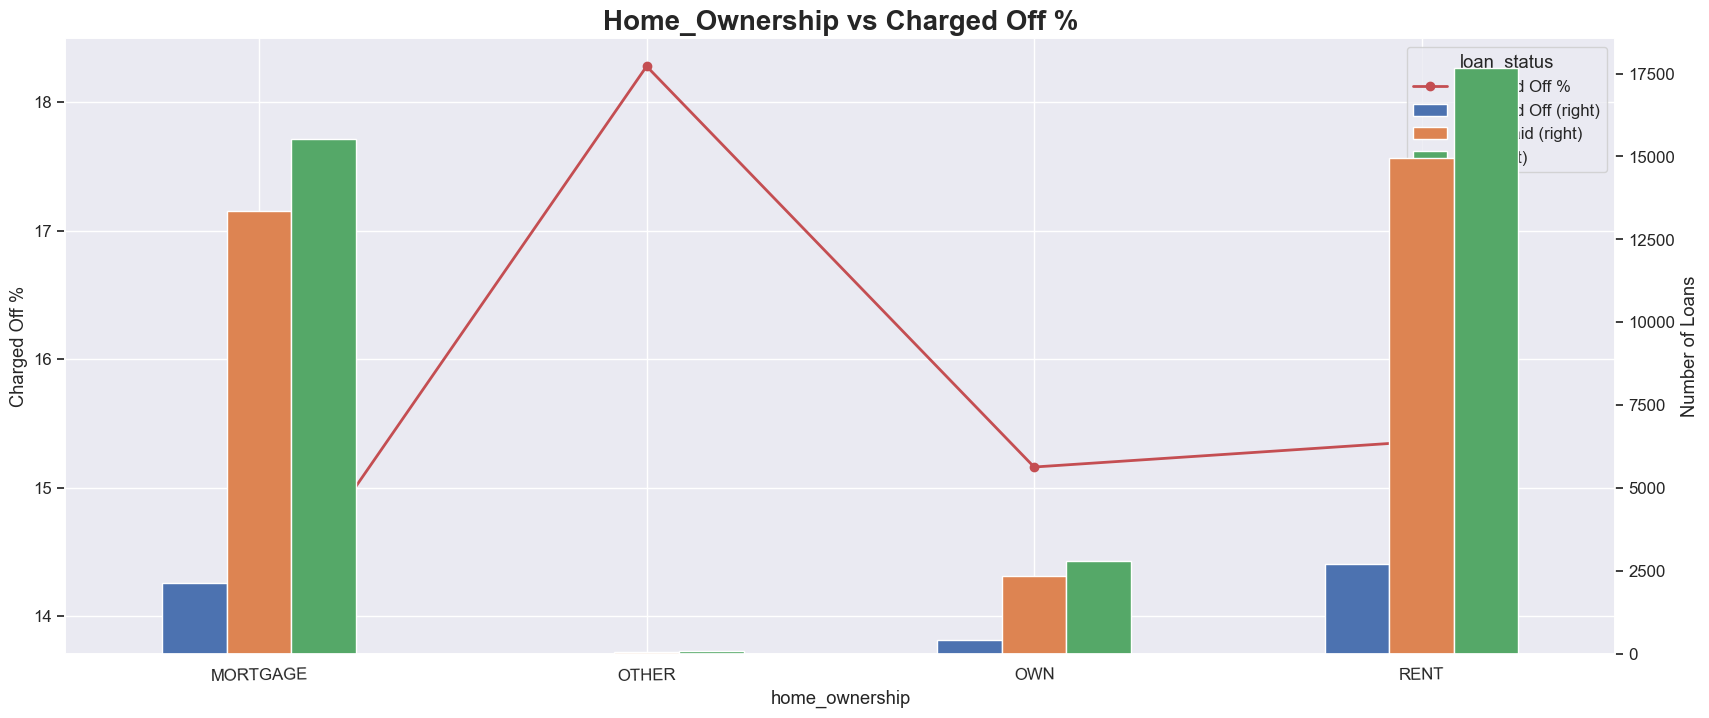

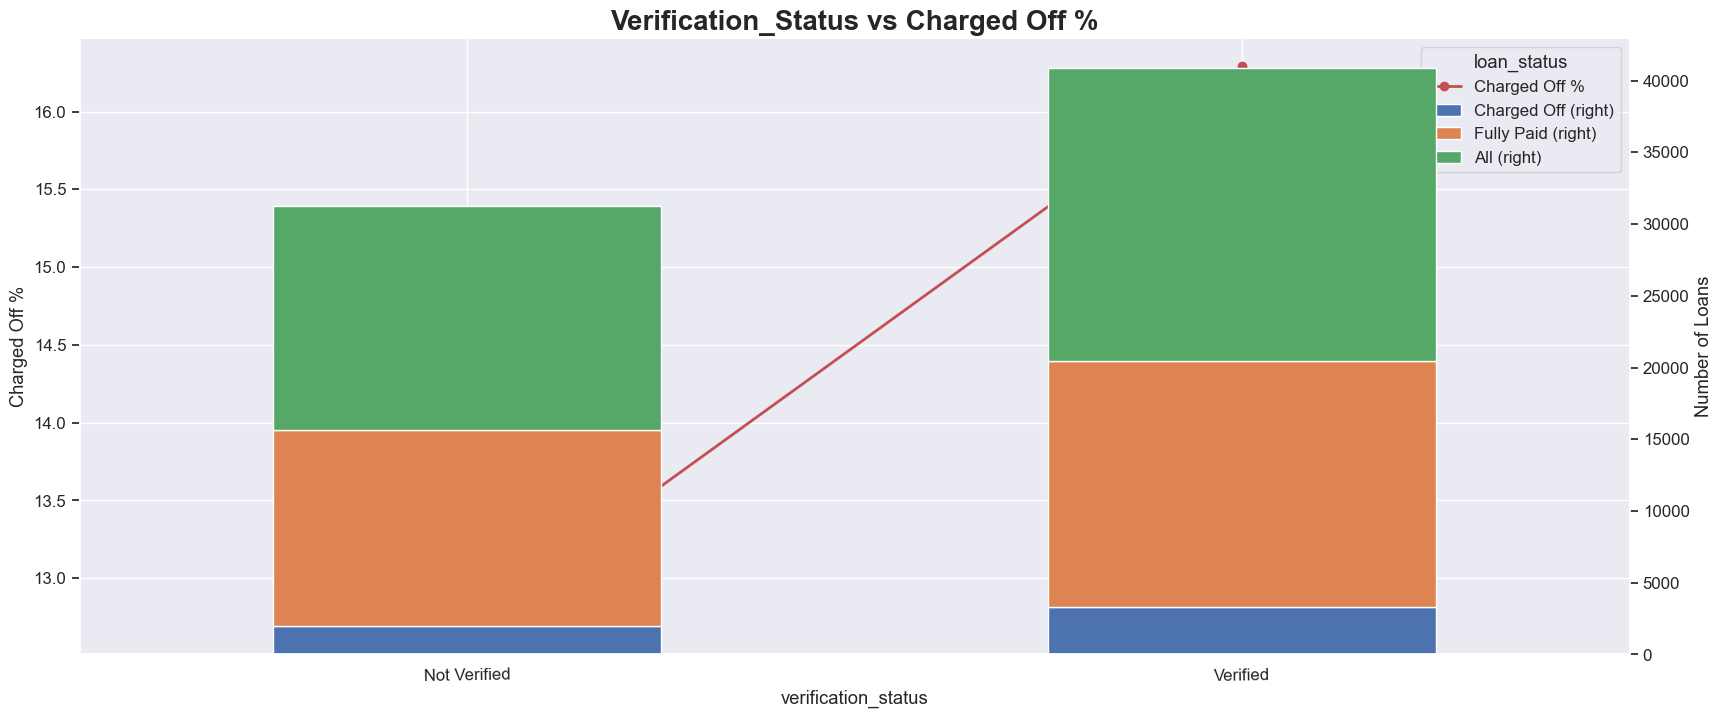

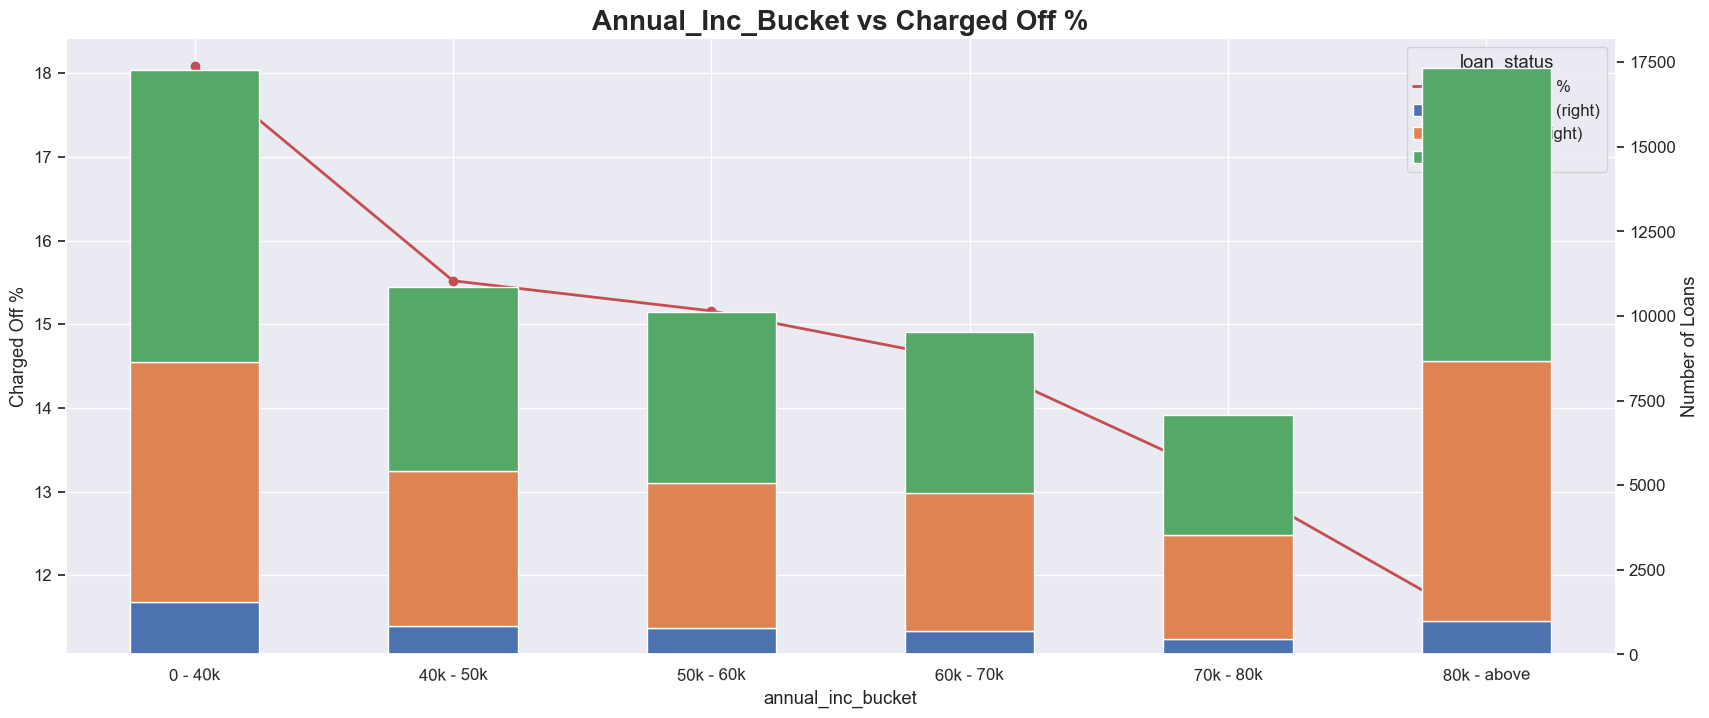

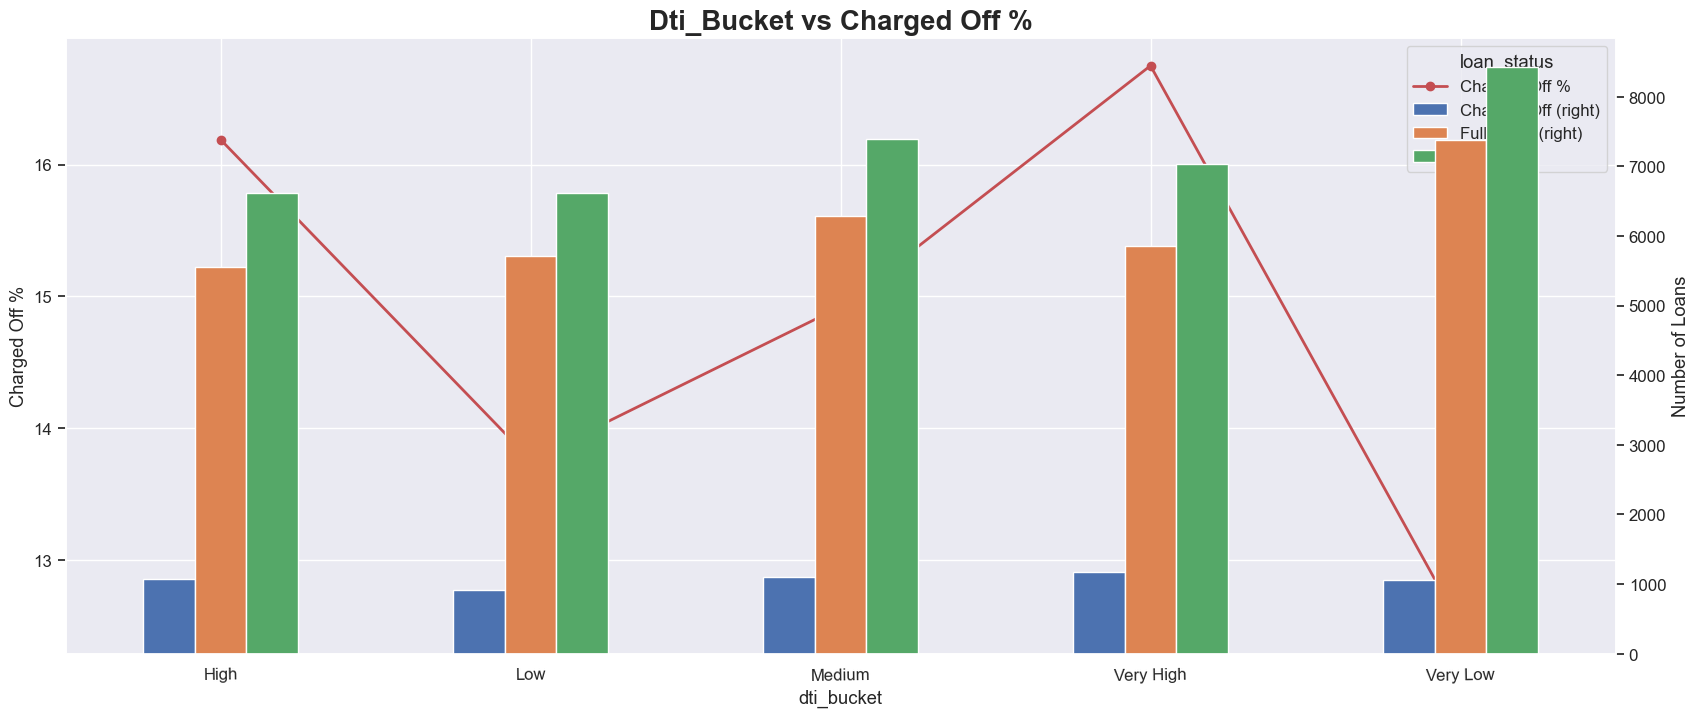

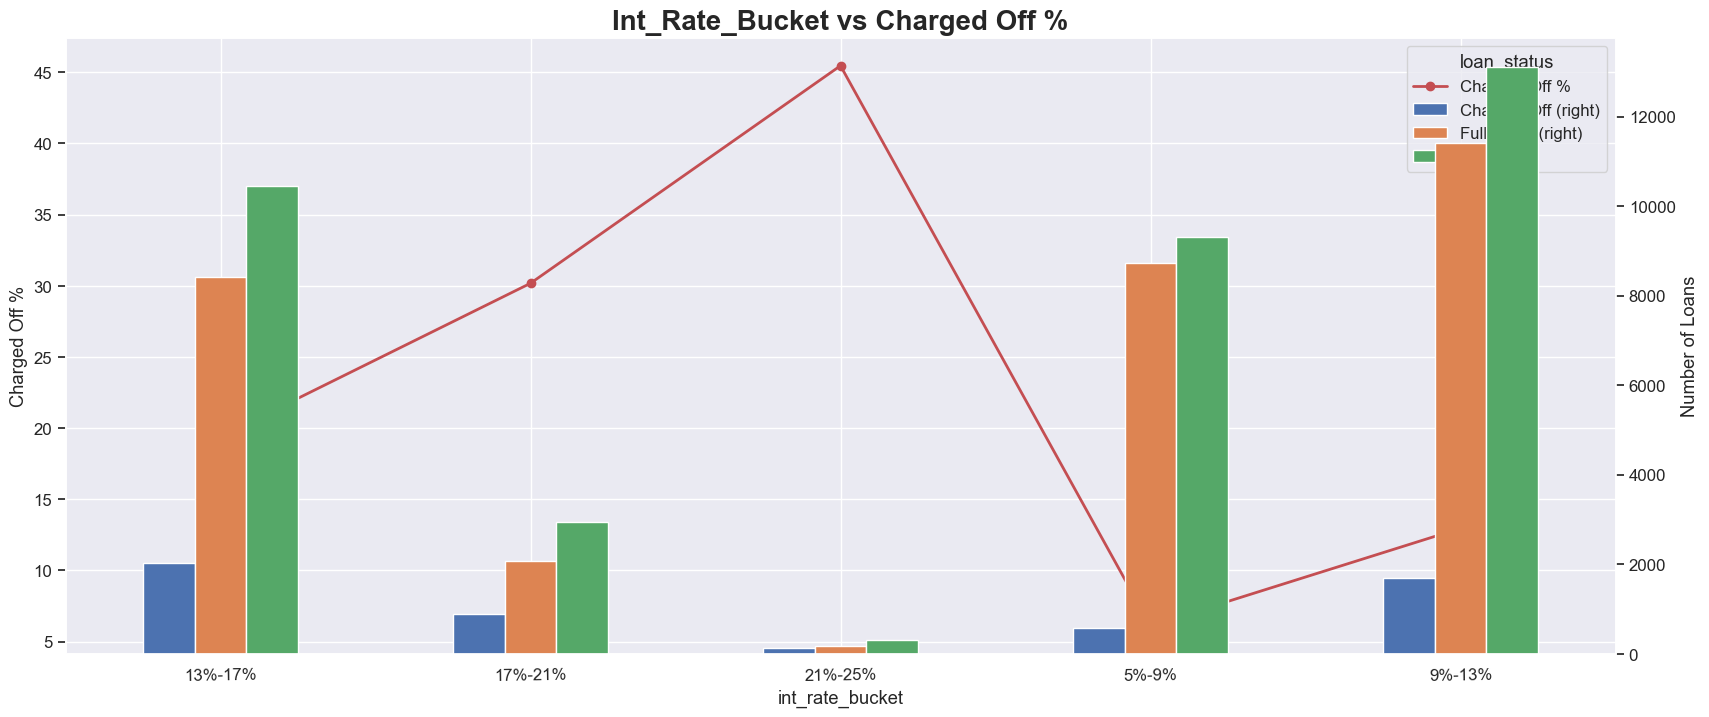

In [172]:
columns_config = {
    'grade': {},
    'sub_grade': {'stacked': True},
    'emp_length': {},
    'addr_state': {},
    'purpose': {},
    'home_ownership': {},
    'verification_status': {'stacked': True},
    'annual_inc_bucket': {'stacked': True},
    'dti_bucket': {},
    'int_rate_bucket': {}
}

for column, plot_config in columns_config.items():
    stacked = plot_config.get('stacked', False)
    plot_charged_off_percentage(loan_df, column, stacked)


### Summary of Multivariate Analysis

- Tendency to default the loan is likely with loan applicants belonging to B, C, D grades.
- Borrowers from sub grade B3, B4 and B5 have maximum tendency to default.
- Loan applicants with 10 years of experience has maximum tendancy to default the loan.
- Borrowers from states CA, FL, NJ have maximum tendency to deafult the loan.
- Borrowers from Rented House Ownership have highest tendency to default the loan.
- The borrowers who are in lower income groups have maximum tendency to default the loan and it generally decreases with the increase in the annual income.
- The tendency to default the loan is increasing with increase in the interest rate.